In [1]:
import pandas as pd   
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset.
df= pd.read_excel("innercity.xlsx")

In [3]:
# First 10 rows of the dataset.
df.head(10)

cid         dayhours    price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000   600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000   190000       2.0       1.00           670.0   
2  7129303070  20140820T000000   735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000   257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000   450000       2.0       1.00          1120.0   
5  8016250080  20140709T000000   245000       3.0       2.50          1610.0   
6   510002519  20140715T000000   466000       2.0       1.50          1140.0   
7  1624059224  20140618T000000  1160000       4.0       3.50          4680.0   
8  5469503280  20140721T000000   449950       4.0       2.50          3100.0   
9  2787460430  20141028T000000   299950       2.0       1.75          1460.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   
5       7223.0    2     0    0.0  ...      0.0      1994             0   
6       1058.0    3     0    0.0  ...      0.0      2005             0   
7       9700.0    2     0    0.0  ...   1320.0      2005             0   
8      10000.0    2     0    0.0  ...      0.0      1978             0   
9      10506.0    1     0    0.0  ...      0.0      1983             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   
5    98030  47.3661        $            1610.0         7162.0       0.0   
6    98103  47.6608 -122.333            1170.0         1116.0       0.0   
7    98006  47.5703 -122.165            2800.0        12343.0       1.0   
8    98042  47.3741  -122.15            1850.0         9438.0       1.0   
9    98031  47.4048 -122.178            1460.0         8153.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  
5        8833  
6        2198  
7       14380  
8       13100  
9       11966  

[10 rows x 23 columns]

In [4]:
# Dimensions of the dataset
print('The Innercity Data has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The Innercity Data has 21613 rows and 23 columns


In [5]:
# Size of the dataset
print('The size of Innercity Data',df.size)

The size of Innercity Data 497099


In [6]:
# Columns in the dataset
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [7]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

### Few columns are with wrong data type, checking for any special characters

In [8]:
#checking the Special Values
df['ceil'].value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

In [9]:
df['coast'].value_counts()

0    21421
1      161
$       30
Name: coast, dtype: int64

In [10]:
df['condition'].value_counts()

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [11]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64

In [12]:
df['total_area'].value_counts()

$         39
7330      19
9060      19
6770      19
5940      19
          ..
26388      1
10005      1
10006      1
10009      1
425986     1
Name: total_area, Length: 11145, dtype: int64

### Replacing Special Character with null values

In [13]:
df["ceil"]=df["ceil"].replace('$',np.nan)
df["coast"]=df["coast"].replace('$',np.nan)
df["condition"]=df["condition"].replace('$',np.nan)
df["yr_built"]=df["yr_built"].replace('$',np.nan)
df["long"]=df["long"].replace('$',np.nan)
df["total_area"]=df["total_area"].replace('$',np.nan)

### Rechecking the info after imputing Special characters

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

### Checking Missing Values

In [15]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

### Missing Value Treatment

In [16]:
from sklearn.impute import KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors = 5)

In [18]:
num = [col for col in df.columns if df[col].dtypes != 'O']

In [19]:
imputed = imputer.fit_transform(df[num])
df_imputed = pd.DataFrame(imputed, columns=df[num].columns)

In [20]:
df_imputed.isnull().sum()

cid                 0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [21]:
df_final = pd.concat([df_imputed, df['dayhours']], axis=1)

In [22]:
df_final.head()

cid     price  room_bed  room_bath  living_measure  lot_measure  \
0  3.876101e+09  600000.0       4.0       1.75          3050.0       9440.0   
1  3.145600e+09  190000.0       2.0       1.00           670.0       3101.0   
2  7.129303e+09  735000.0       4.0       2.75          3040.0       2415.0   
3  7.338220e+09  257000.0       3.0       2.50          1740.0       3721.0   
4  7.950301e+09  450000.0       2.0       1.00          1120.0       4590.0   

   ceil  coast  sight  condition  ...  yr_built  yr_renovated  zipcode  \
0   1.0    0.0    0.0        3.0  ...    1966.0           0.0  98034.0   
1   1.0    0.0    0.0        4.0  ...    1948.0           0.0  98118.0   
2   2.0    1.0    4.0        3.0  ...    1966.0           0.0  98118.0   
3   2.0    0.0    0.0        3.0  ...    2009.0           0.0  98002.0   
4   1.0    0.0    0.0        3.0  ...    1924.0           0.0  98118.0   

       lat     long  living_measure15  lot_measure15  furnished  total_area  \
0  47.7228 -122.183            2020.0         8660.0        0.0     12490.0   
1  47.5546 -122.274            1660.0         4100.0        0.0      3771.0   
2  47.5188 -122.256            2620.0         2433.0        0.0      5455.0   
3  47.3363 -122.213            2030.0         3794.0        0.0      5461.0   
4  47.5663 -122.285            1120.0         5100.0        0.0      5710.0   

          dayhours  
0  20150427T000000  
1  20150317T000000  
2  20140820T000000  
3  20141010T000000  
4  20150218T000000  

[5 rows x 23 columns]

In [23]:
df_final['cid'] = df['cid'].apply(np.int64)
df_final['price'] = df['price'].apply(np.int64)
df_final['yr_renovated'] = df['yr_renovated'].apply(np.int64)
df_final['zipcode'] = df['zipcode'].apply(np.int64)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   price             21613 non-null  int64  
 2   room_bed          21613 non-null  float64
 3   room_bath         21613 non-null  float64
 4   living_measure    21613 non-null  float64
 5   lot_measure       21613 non-null  float64
 6   ceil              21613 non-null  float64
 7   coast             21613 non-null  float64
 8   sight             21613 non-null  float64
 9   condition         21613 non-null  float64
 10  quality           21613 non-null  float64
 11  ceil_measure      21613 non-null  float64
 12  basement          21613 non-null  float64
 13  yr_built          21613 non-null  float64
 14  yr_renovated      21613 non-null  int64  
 15  zipcode           21613 non-null  int64  
 16  lat               21613 non-null  float6

In [25]:
print('The Innercity Data has {} rows and {} columns'.format(df_final.shape[0],df_final.shape[1]))

The Innercity Data has 21613 rows and 23 columns


In [26]:
#checking for duplicates
dups = df_final.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [27]:
# Describing the data
df_final.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.371184e+00  9.289046e-01  0.000000e+00   
room_bath         21613.0  2.115093e+00  7.690269e-01  0.000000e+00   
living_measure    21613.0  2.079818e+03  9.182427e+02  2.900000e+02   
lot_measure       21613.0  1.509973e+04  4.138666e+04  5.200000e+02   
ceil              21613.0  1.494036e+00  5.393399e-01  1.000000e+00   
coast             21613.0  7.467728e-03  8.603022e-02  0.000000e+00   
sight             21613.0  2.341276e-01  7.657419e-01  0.000000e+00   
condition         21613.0  3.409346e+00  6.499317e-01  1.000000e+00   
quality           21613.0  7.656855e+00  1.175457e+00  1.000000e+00   
ceil_measure      21613.0  1.788368e+03  8.280834e+02  2.900000e+02   
basement          21613.0  2.915173e+02  4.425713e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.936936e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408197e-01 -1.225190e+02   
living_measure15  21613.0  1.986691e+03  6.847548e+02  3.990000e+02   
lot_measure15     21613.0  1.276203e+04  2.727111e+04  6.510000e+02   
furnished         21613.0  1.967797e-01  3.974386e-01  0.000000e+00   
total_area        21613.0  1.717963e+04  4.156833e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.620000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.580000e+03  1.300000e+04  1.652659e+06

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [29]:
from uszipcode import SearchEngine
search = SearchEngine()

In [30]:
def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'
df_final['city'] = df_final['zipcode'].apply(zco)

In [31]:
df_final.head()

cid   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0  3876100940  600000       4.0       1.75          3050.0       9440.0   1.0   
1  3145600250  190000       2.0       1.00           670.0       3101.0   1.0   
2  7129303070  735000       4.0       2.75          3040.0       2415.0   2.0   
3  7338220280  257000       3.0       2.50          1740.0       3721.0   2.0   
4  7950300670  450000       2.0       1.00          1120.0       4590.0   1.0   

   coast  sight  condition  ...  yr_renovated  zipcode      lat     long  \
0    0.0    0.0        3.0  ...             0    98034  47.7228 -122.183   
1    0.0    0.0        4.0  ...             0    98118  47.5546 -122.274   
2    1.0    4.0        3.0  ...             0    98118  47.5188 -122.256   
3    0.0    0.0        3.0  ...             0    98002  47.3363 -122.213   
4    0.0    0.0        3.0  ...             0    98118  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  total_area         dayhours  \
0            2020.0         8660.0        0.0     12490.0  20150427T000000   
1            1660.0         4100.0        0.0      3771.0  20150317T000000   
2            2620.0         2433.0        0.0      5455.0  20140820T000000   
3            2030.0         3794.0        0.0      5461.0  20141010T000000   
4            1120.0         5100.0        0.0      5710.0  20150218T000000   

       city  
0  Kirkland  
1   Seattle  
2   Seattle  
3    Auburn  
4   Seattle  

[5 rows x 24 columns]

In [32]:
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df_final['has_basement'] = df_final['basement'].apply(create_basement_group)

In [33]:
df1=df_final.copy()
df_final.dayhours=df_final.dayhours.str.replace('T000000', "")
df_final.dayhours=pd.to_datetime(df_final.dayhours,format='%Y%m%d')
df_final['month_year']=df_final['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
df_final['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [34]:
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df_final['has_renovated'] = df_final['yr_renovated'].apply(create_renovated_group)

In [35]:
df_final =df_final.drop(['cid','dayhours','yr_renovated','zipcode','lat','long'],axis=1)

In [36]:
df_final.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ...  basement  yr_built  living_measure15  \
0    0.0        3.0      8.0  ...    1250.0    1966.0            2020.0   
1    0.0        4.0      6.0  ...       0.0    1948.0            1660.0   
2    4.0        3.0      8.0  ...       0.0    1966.0            2620.0   
3    0.0        3.0      8.0  ...       0.0    2009.0            2030.0   
4    0.0        3.0      7.0  ...       0.0    1924.0            1120.0   

   lot_measure15  furnished  total_area      city has_basement     month_year  \
0         8660.0        0.0     12490.0  Kirkland          Yes     April-2015   
1         4100.0        0.0      3771.0   Seattle           No     March-2015   
2         2433.0        0.0      5455.0   Seattle           No    August-2014   
3         3794.0        0.0      5461.0    Auburn           No   October-2014   
4         5100.0        0.0      5710.0   Seattle           No  February-2015   

  has_renovated  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 21 columns]

### Univarite Analysis


### Price

Skewness is : 4.021715573048685


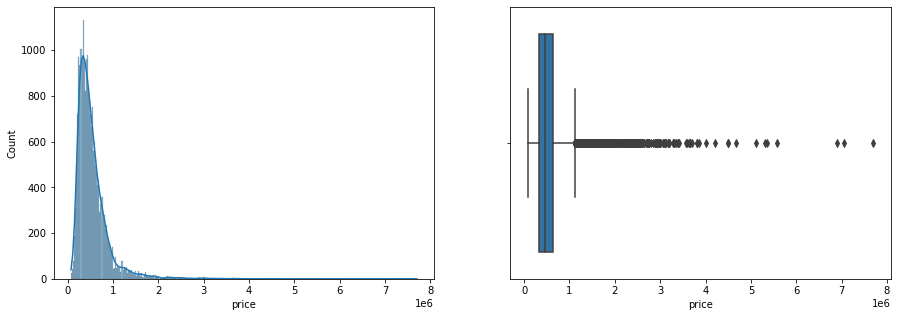

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['price'], kde=True, ax=axes[0])
sns.boxplot(x='price', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.price.skew())

### Room_bed

Skewness is : 1.9804844621681594


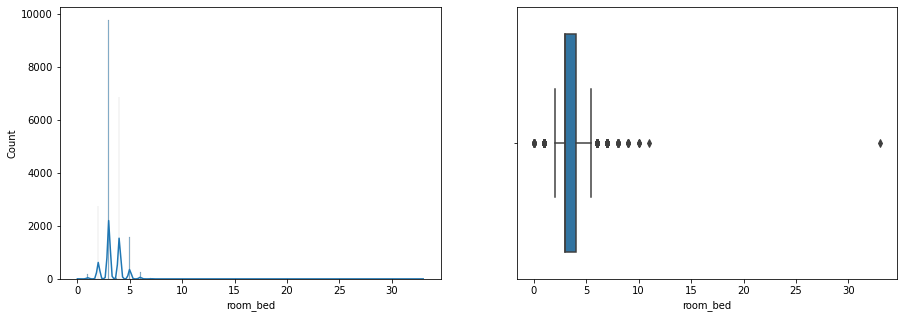

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['room_bed'], kde=True, ax=axes[0])
sns.boxplot(x='room_bed', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.room_bed.skew())

### Room_Bath

Skewness is : 0.5118036297254617


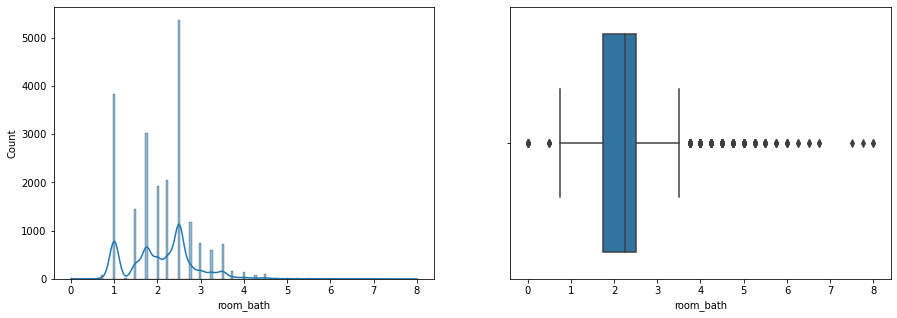

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['room_bath'], kde=True, ax=axes[0])
sns.boxplot(x='room_bath', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.room_bath.skew())

### Living Measure

Skewness is : 1.4726891058665095


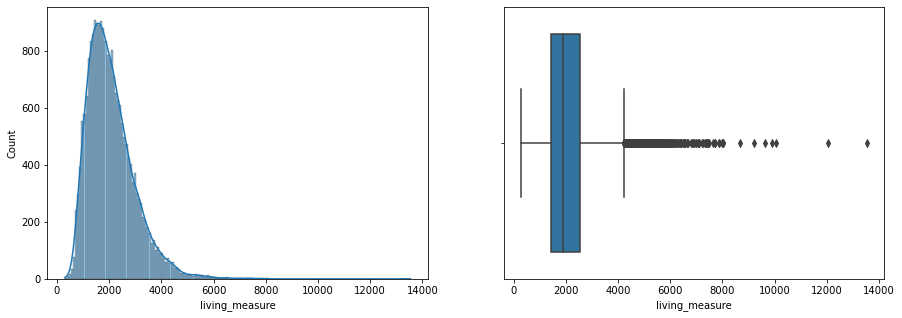

In [40]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['living_measure'], kde=True, ax=axes[0])
sns.boxplot(x='living_measure', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.living_measure.skew())

### Lot Measure

Skewness is : 13.082377201297652


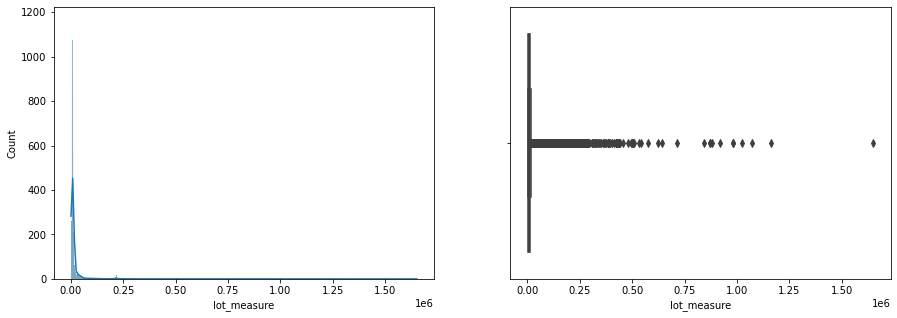

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['lot_measure'], kde=True, ax=axes[0])
sns.boxplot(x='lot_measure', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.lot_measure.skew())

### Sight

Skewness is : 3.397458522534706


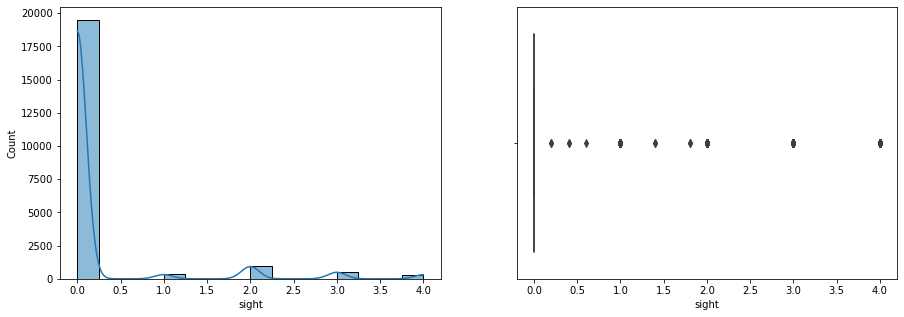

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['sight'], kde=True, ax=axes[0])
sns.boxplot(x='sight', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.sight.skew())

### Quality

Skewness is : 0.771153718807721


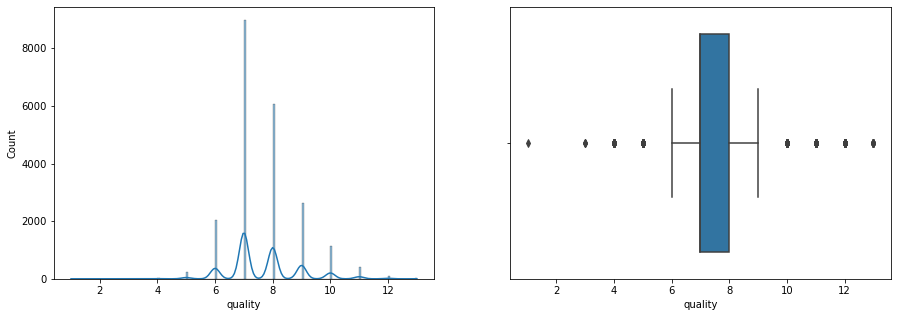

In [43]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['quality'], kde=True, ax=axes[0])
sns.boxplot(x='quality', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.quality.skew())

### Ceil Measure

Skewness is : 1.4467747475316406


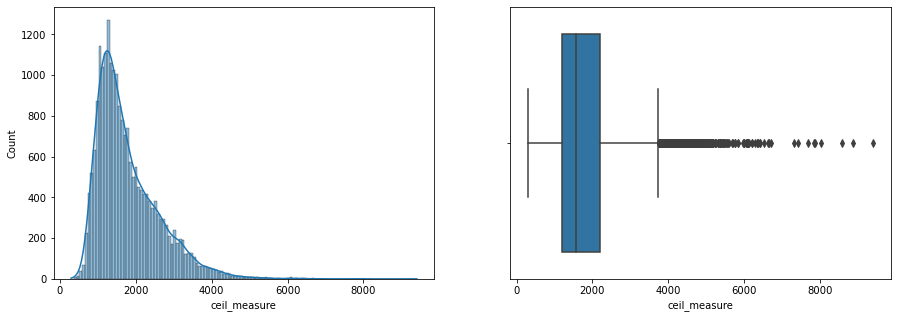

In [44]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['ceil_measure'], kde=True, ax=axes[0])
sns.boxplot(x='ceil_measure', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.ceil_measure.skew())

### Basement

Skewness is : 1.5779619783703704


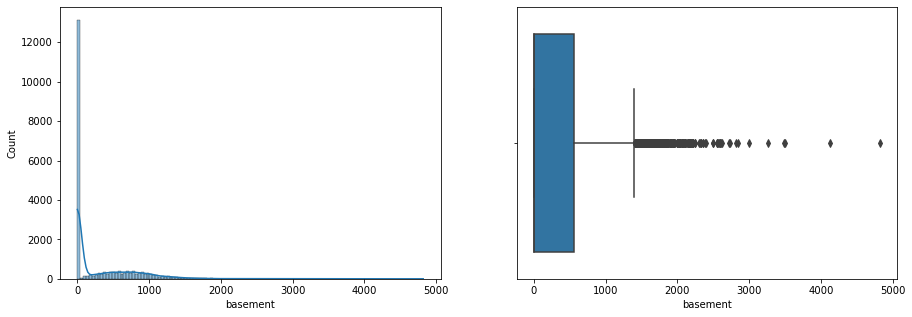

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['basement'], kde=True, ax=axes[0])
sns.boxplot(x='basement', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.basement.skew())

### living_measure15

Skewness is : 1.1079720872273722


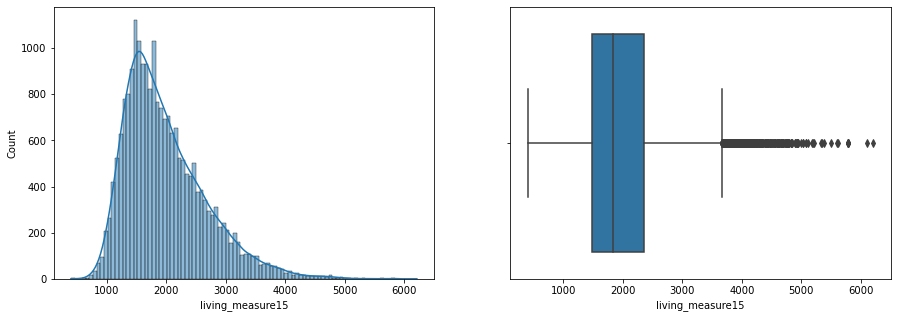

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['living_measure15'], kde=True, ax=axes[0])
sns.boxplot(x='living_measure15', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.living_measure15.skew())

### lot_measure15

Skewness is : 9.523530573011517


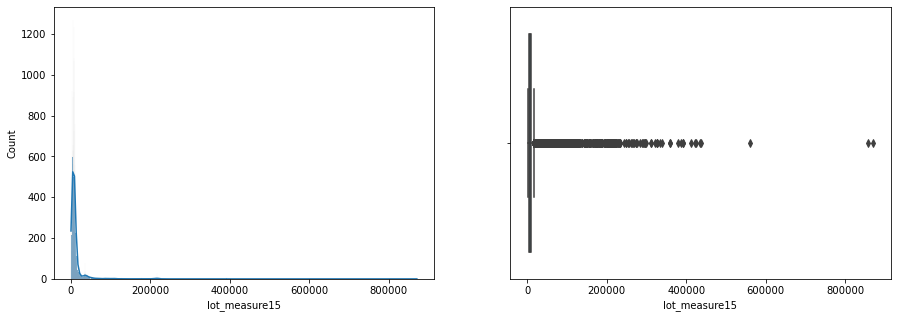

In [47]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['lot_measure15'], kde=True, ax=axes[0])
sns.boxplot(x='lot_measure15', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.lot_measure15.skew())

### Furnished

Skewness is : 1.5256189292578686


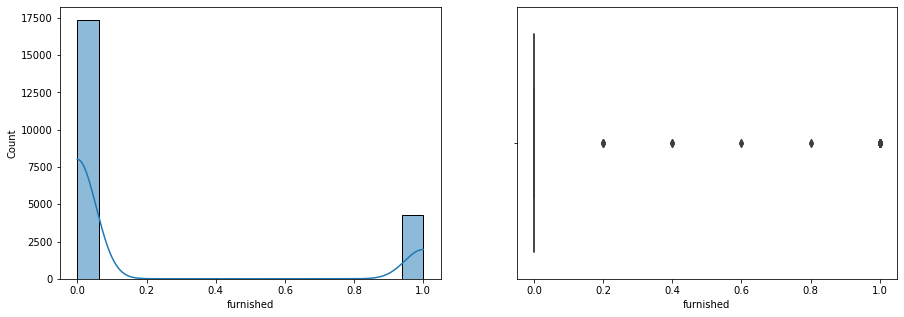

In [48]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['furnished'], kde=True, ax=axes[0])
sns.boxplot(x='furnished', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.furnished.skew())

In [49]:
df_final['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

### Ceil

Skewness is : 0.6169495119670787


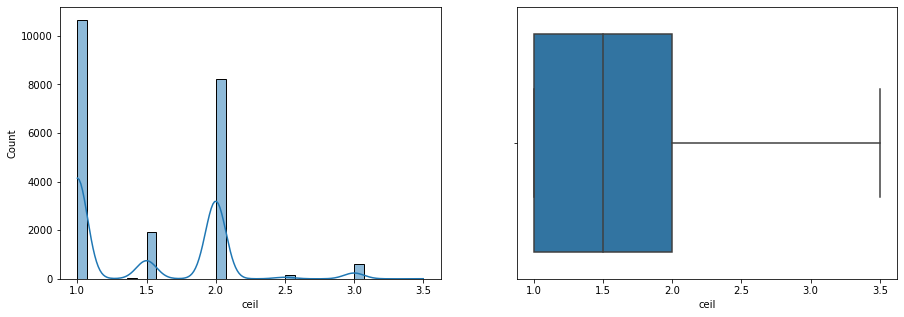

In [50]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['ceil'], kde=True, ax=axes[0])
sns.boxplot(x='ceil', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.ceil.skew())

### Coast

Skewness is : 11.444428296870024


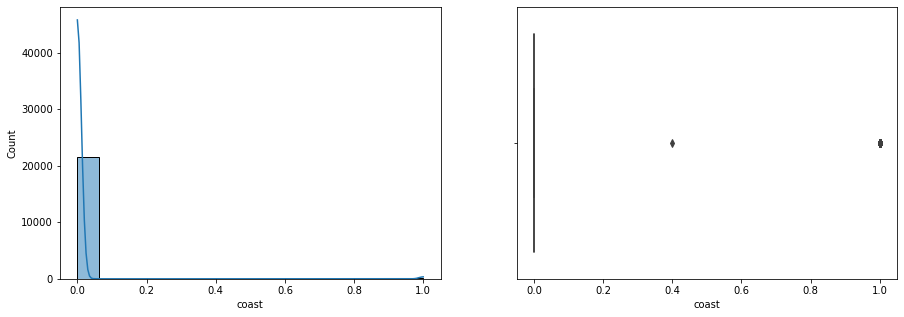

In [51]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['coast'], kde=True, ax=axes[0])
sns.boxplot(x='coast', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.coast.skew())

### Condition

Skewness is : 1.0332586974263942


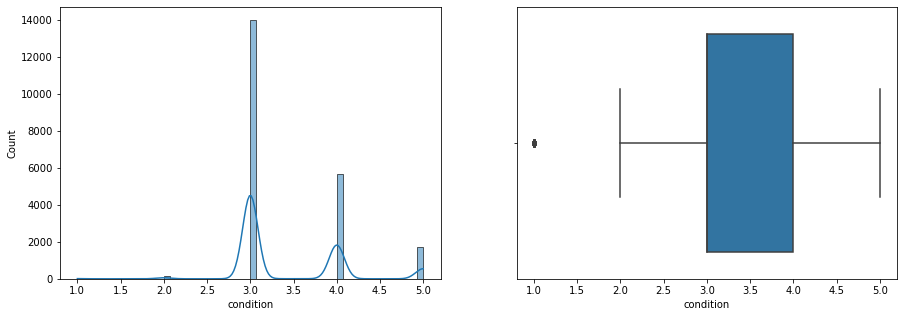

In [52]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['condition'], kde=True, ax=axes[0])
sns.boxplot(x='condition', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.condition.skew())

### yr_built

Skewness is : -0.46977507272157504


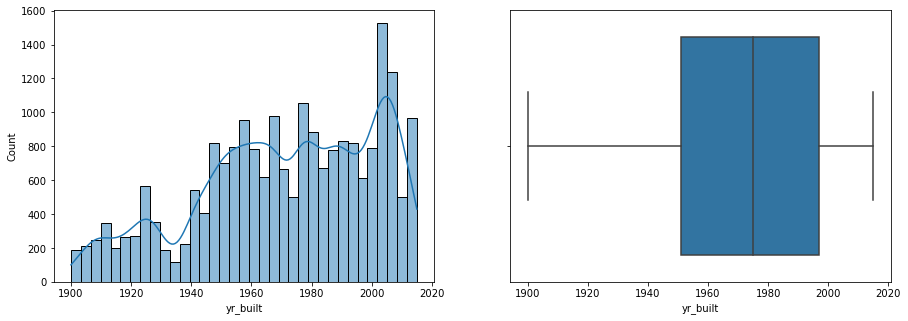

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['yr_built'], kde=True, ax=axes[0])
sns.boxplot(x='yr_built', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.yr_built.skew())

### Total Area

Skewness is : 12.9710746671615


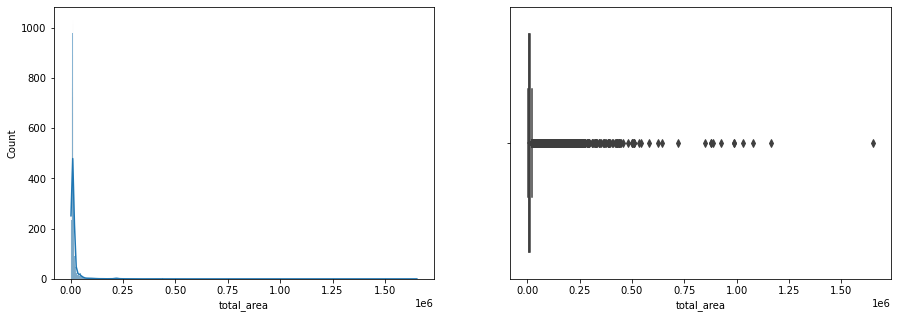

In [54]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['total_area'], kde=True, ax=axes[0])
sns.boxplot(x='total_area', data=df_final, ax=axes[1]);
print("Skewness is :",df_final.total_area.skew())

### Outlier Treatment

In [55]:
def remove_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3- Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [56]:
lr,ur = remove_outlier(df_final['ceil_measure'])
df_final['ceil_measure']=np.where(df_final['ceil_measure']>ur,ur,df_final['ceil_measure'])
df_final['ceil_measure']=np.where(df_final['ceil_measure']<lr,lr,df_final['ceil_measure'])

lr,ur = remove_outlier(df_final['basement'])
df_final['basement']=np.where(df_final['basement']>ur,ur,df_final['basement'])
df_final['basement']=np.where(df_final['basement']<lr,lr,df_final['basement'])

lr,ur = remove_outlier(df_final['living_measure'])
df_final['living_measure']=np.where(df_final['living_measure']>ur,ur,df_final['living_measure'])
df_final['living_measure']=np.where(df_final['living_measure']<lr,lr,df_final['living_measure'])

lr,ur = remove_outlier(df_final['lot_measure'])
df_final['lot_measure']=np.where(df_final['lot_measure']>ur,ur,df_final['lot_measure'])
df_final['lot_measure']=np.where(df_final['lot_measure']<lr,lr,df_final['lot_measure'])


lr,ur = remove_outlier(df_final['room_bed'])
df_final['room_bed']=np.where(df_final['room_bed']>ur,ur,df_final['room_bed'])
df_final['room_bed']=np.where(df_final['room_bed']<lr,lr,df_final['room_bed'])




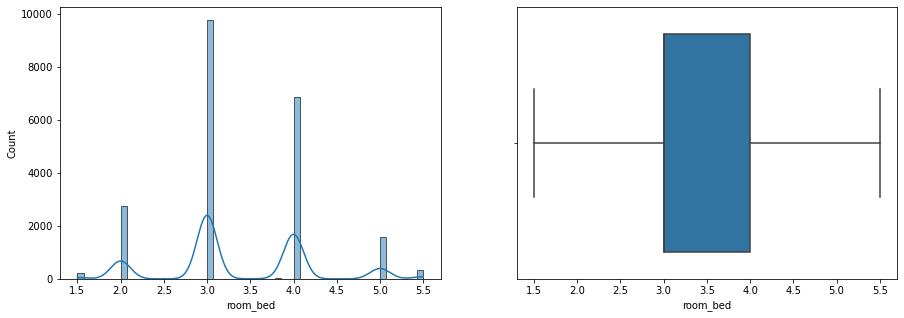

In [57]:
#After Treating Outliers
#Room_Bed

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['room_bed'], kde=True, ax=axes[0])
sns.boxplot(x='room_bed', data=df_final, ax=axes[1]);


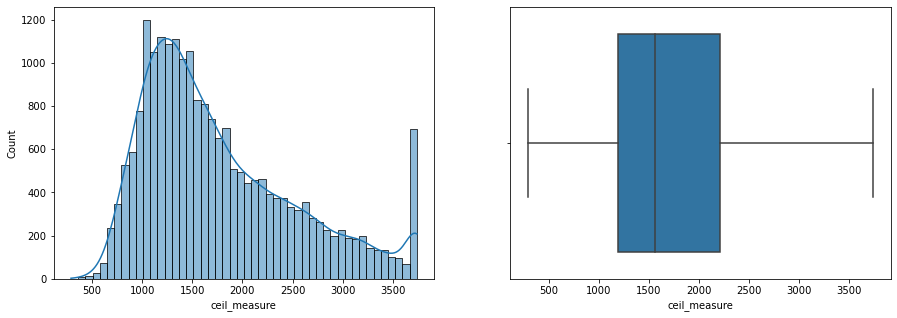

In [58]:
#Ceil_Measure
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['ceil_measure'], kde=True, ax=axes[0])
sns.boxplot(x='ceil_measure', data=df_final, ax=axes[1]);

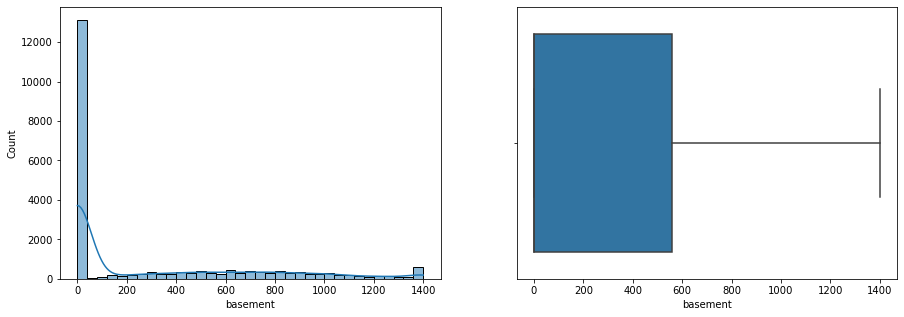

In [59]:
#basement
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['basement'], kde=True, ax=axes[0])
sns.boxplot(x='basement', data=df_final, ax=axes[1]);

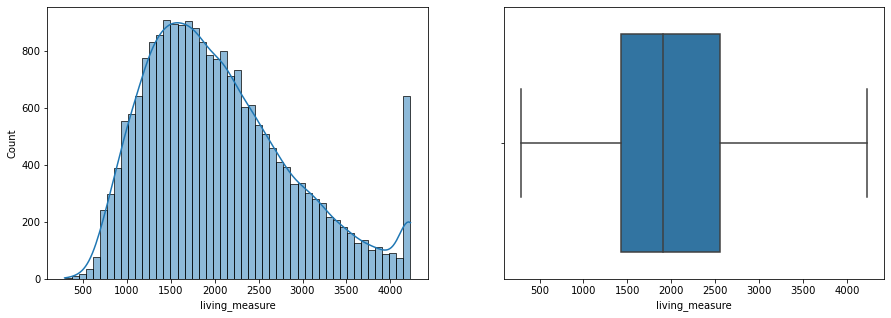

In [60]:
#Living Measure

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['living_measure'], kde=True, ax=axes[0])
sns.boxplot(x='living_measure', data=df_final, ax=axes[1]);

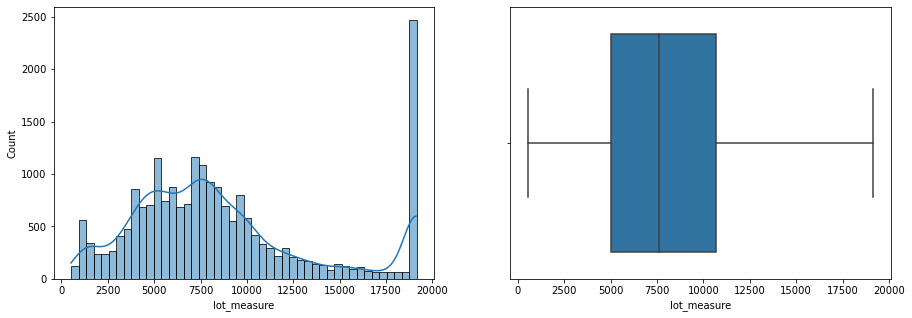

In [61]:
#Lot_measure 

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df_final['lot_measure'], kde=True, ax=axes[0])
sns.boxplot(x='lot_measure', data=df_final, ax=axes[1]);

### Bivariate Analysis

### Pairplot

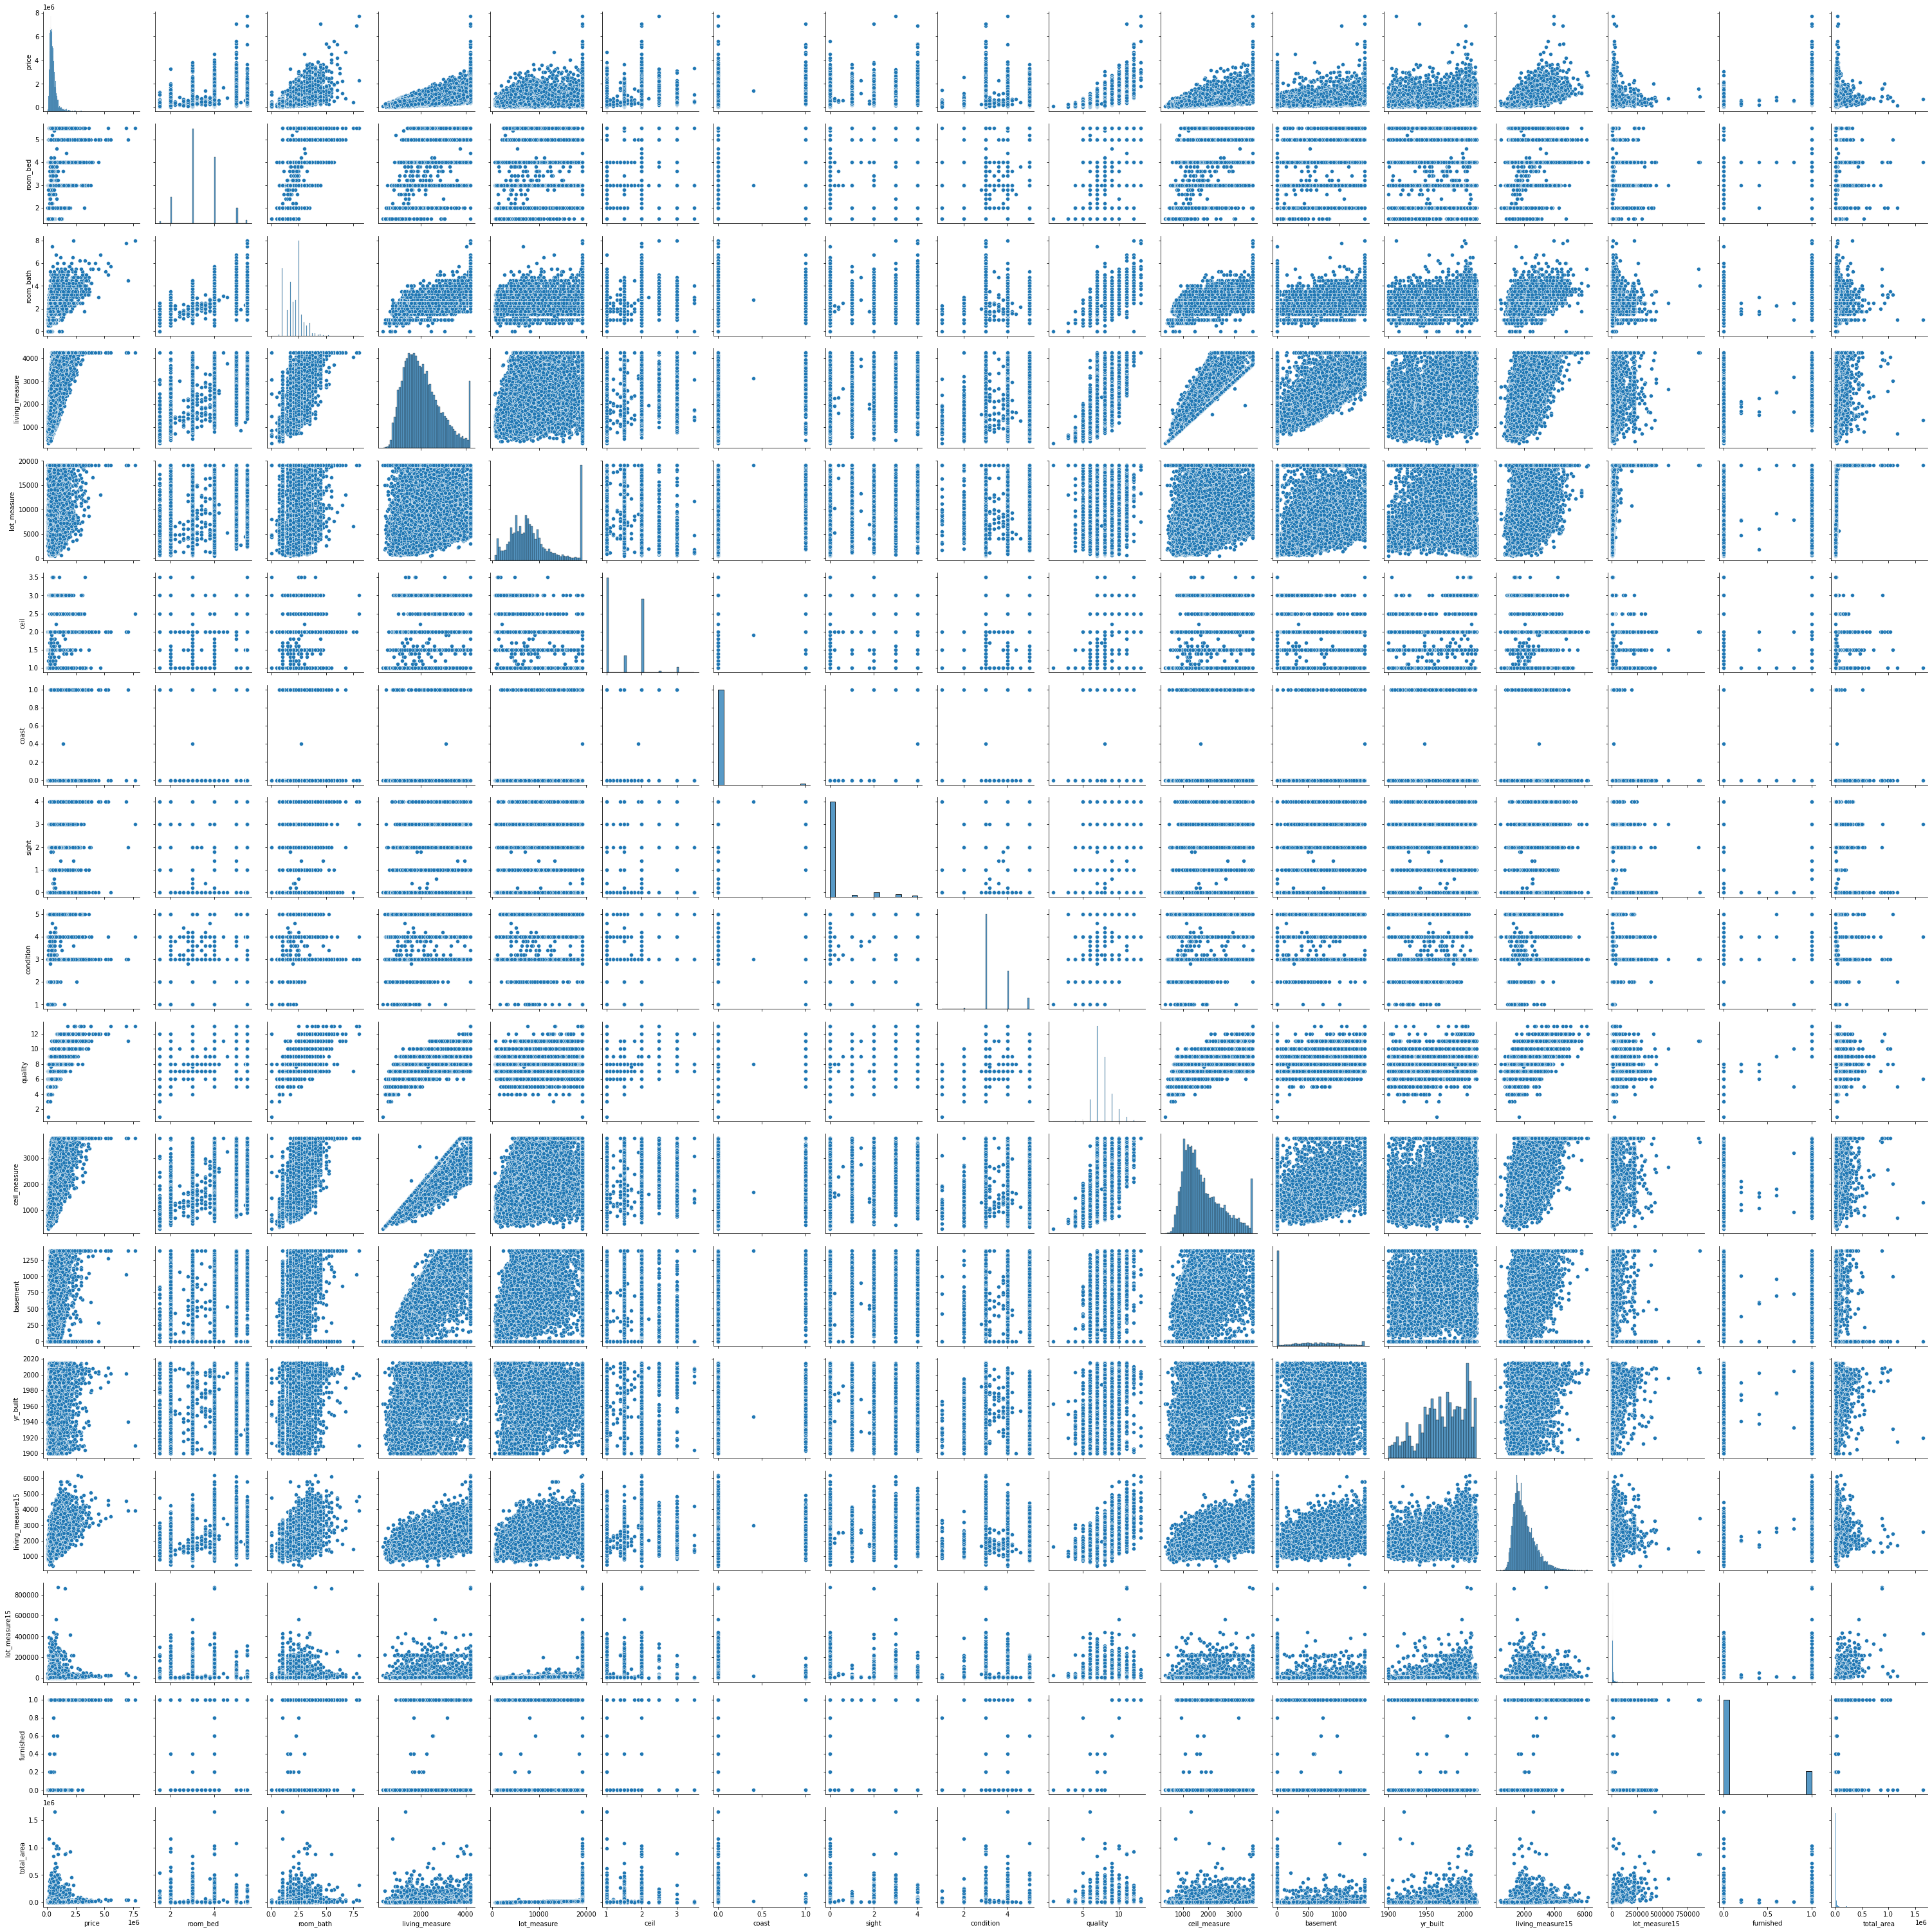

In [62]:
sns.pairplot(df_final);

In [63]:
df_corr = df_final.corr(method ='pearson')
df_corr

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.317947   0.525143        0.646860     0.195848   
room_bed          0.317947  1.000000   0.529778        0.616627     0.194499   
room_bath         0.525143  0.529778   1.000000        0.748430     0.124429   
living_measure    0.646860  0.616627   0.748430        1.000000     0.348294   
lot_measure       0.195848  0.194499   0.124429        0.348294     1.000000   
ceil              0.256985  0.184030   0.499148        0.363829    -0.191535   
coast             0.266417 -0.005743   0.062227        0.085278     0.102959   
sight             0.397404  0.081967   0.186443        0.266658     0.144176   
condition         0.035806  0.024120  -0.126375       -0.059714     0.066315   
quality           0.667473  0.375848   0.664655        0.759719     0.230720   
ceil_measure      0.559278  0.510489   0.677405        0.868767     0.320503   
basement          0.289695  0.301551   0.265000        0.399249     0.099225   
yr_built          0.053985  0.170452   0.506086        0.333708     0.036289   
living_measure15  0.584868  0.417945   0.567695        0.762374     0.393057   
lot_measure15     0.082507  0.033814   0.087002        0.171104     0.480735   
furnished         0.565978  0.277512   0.484574        0.640566     0.239959   
total_area        0.104800  0.048487   0.103954        0.182330     0.447615   

                      ceil     coast     sight  condition   quality  \
price             0.256985  0.266417  0.397404   0.035806  0.667473   
room_bed          0.184030 -0.005743  0.081967   0.024120  0.375848   
room_bath         0.499148  0.062227  0.186443  -0.126375  0.664655   
living_measure    0.363829  0.085278  0.266658  -0.059714  0.759719   
lot_measure      -0.191535  0.102959  0.144176   0.066315  0.230720   
ceil              1.000000  0.024454  0.029519  -0.263947  0.458019   
coast             0.024454  1.000000  0.400926   0.017322  0.082536   
sight             0.029519  0.400926  1.000000   0.045990  0.251047   
condition        -0.263947  0.017322  0.045990   1.000000 -0.145153   
quality           0.458019  0.082536  0.251047  -0.145153  1.000000   
ceil_measure      0.542004  0.062515  0.156647  -0.163886  0.749641   
basement         -0.255678  0.065305  0.259162   0.179741  0.145515   
yr_built          0.488605 -0.025994 -0.052910  -0.361483  0.446858   
living_measure15  0.280027  0.086176  0.280449  -0.093681  0.712475   
lot_measure15    -0.011075  0.030751  0.072916  -0.003232  0.119242   
furnished         0.347463  0.069341  0.219795  -0.122874  0.788311   
total_area        0.002594  0.023510  0.081009  -0.009981  0.129888   

                  ceil_measure  basement  yr_built  living_measure15  \
price                 0.559278  0.289695  0.053985          0.584868   
room_bed              0.510489  0.301551  0.170452          0.417945   
room_bath             0.677405  0.265000  0.506086          0.567695   
living_measure        0.868767  0.399249  0.333708          0.762374   
lot_measure           0.320503  0.099225  0.036289          0.393057   
ceil                  0.542004 -0.255678  0.488605          0.280027   
coast                 0.062515  0.065305 -0.025994          0.086176   
sight                 0.156647  0.259162 -0.052910          0.280449   
condition            -0.163886  0.179741 -0.361483         -0.093681   
quality               0.749641  0.145515  0.446858          0.712475   
ceil_measure          1.000000 -0.092483  0.441170          0.732276   
basement             -0.092483  1.000000 -0.144535          0.179314   
yr_built              0.441170 -0.144535  1.000000          0.326293   
living_measure15      0.732276  0.179314  0.326293          1.000000   
lot_measure15         0.180709  0.006188  0.070808          0.184666   
furnished             0.658491  0.072076  0.304880          0.620013   
total_area            0.188048  0.014469  0.059751          0.161560   

    

### HeatMap

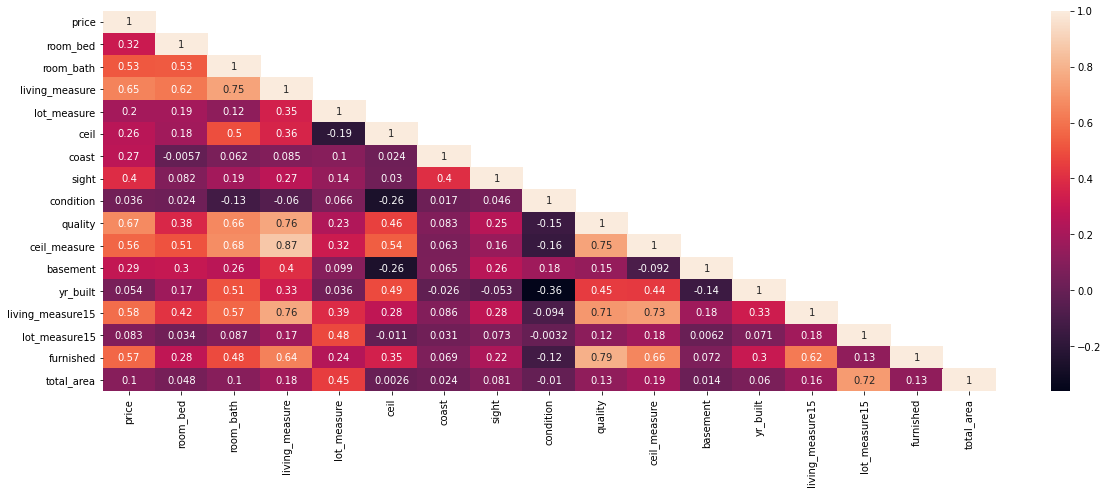

In [64]:
plt.figure(figsize=(20,7))
sns.heatmap(df_final.corr(),annot = True, mask = np.triu(df_final.corr(),+1));

### Bivariate : Price : Month_Year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'April-2015'),
  Text(1, 0, 'March-2015'),
  Text(2, 0, 'August-2014'),
  Text(3, 0, 'October-2014'),
  Text(4, 0, 'February-2015'),
  Text(5, 0, 'July-2014'),
  Text(6, 0, 'June-2014'),
  Text(7, 0, 'May-2014'),
  Text(8, 0, 'January-2015'),
  Text(9, 0, 'September-2014'),
  Text(10, 0, 'November-2014'),
  Text(11, 0, 'December-2014'),
  Text(12, 0, 'May-2015')])

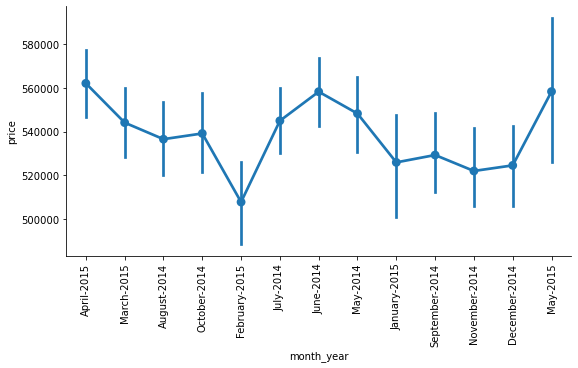

In [65]:
sns.factorplot(x='month_year',y='price',data=df_final, size=4, aspect=2)
plt.xticks(rotation=90)

### Bivariate : Price : Room_bed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1.5'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.2'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.6'),
  Text(5, 0, '2.8'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.2'),
  Text(8, 0, '3.4'),
  Text(9, 0, '3.6'),
  Text(10, 0, '3.8'),
  Text(11, 0, '4.0'),
  Text(12, 0, '4.2'),
  Text(13, 0, '4.4'),
  Text(14, 0, '4.6'),
  Text(15, 0, '5.0'),
  Text(16, 0, '5.2'),
  Text(17, 0, '5.4'),
  Text(18, 0, '5.5')])

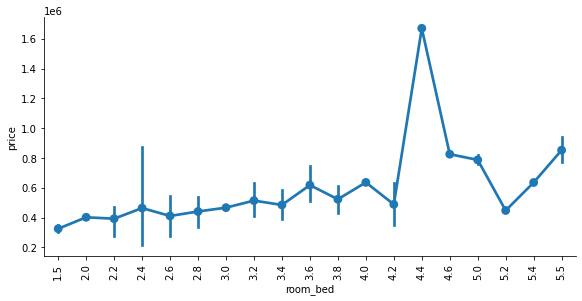

In [66]:
sns.factorplot(x='room_bed',y='price',data=df_final, size=4, aspect=2)
plt.xticks(rotation=90)

### Bivariate : Price : Room_bath

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '0.75'),
  Text(3, 0, '1.0'),
  Text(4, 0, '1.15'),
  Text(5, 0, '1.25'),
  Text(6, 0, '1.3'),
  Text(7, 0, '1.35'),
  Text(8, 0, '1.4'),
  Text(9, 0, '1.45'),
  Text(10, 0, '1.5'),
  Text(11, 0, '1.55'),
  Text(12, 0, '1.6'),
  Text(13, 0, '1.65'),
  Text(14, 0, '1.7'),
  Text(15, 0, '1.75'),
  Text(16, 0, '1.8'),
  Text(17, 0, '1.85'),
  Text(18, 0, '1.9'),
  Text(19, 0, '1.95'),
  Text(20, 0, '2.0'),
  Text(21, 0, '2.05'),
  Text(22, 0, '2.1'),
  Text(23, 0, '2.15'),
  Text(24, 0, '2.2'),
  Text(25, 0, '2.25'),
  Text(26, 0, '2.3'),
  Text(27, 0, '2.35'),
  Text(28, 0, '2.4'),
  Text(29, 0, '2.45'),
  Text(30, 0, '2.5'),
  Text(31, 0, '2.55'),
  Text(32, 0, '2.6')

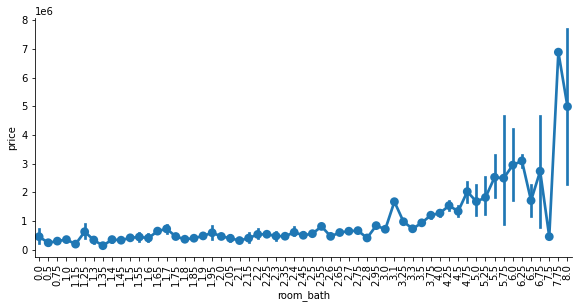

In [67]:
sns.factorplot(x='room_bath',y='price',data=df_final, size=4, aspect=2)
plt.xticks(rotation=90)

### Bivariate : Price : Living Measure

<AxesSubplot:xlabel='living_measure', ylabel='price'>

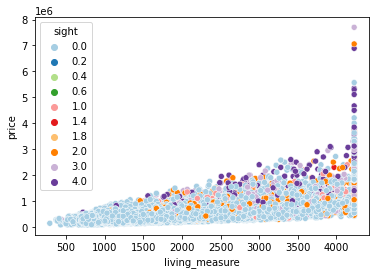

In [68]:
sns.scatterplot(df_final['living_measure'],df_final['price'],hue=df_final['sight'],palette='Paired',legend='full')

<AxesSubplot:xlabel='living_measure', ylabel='price'>

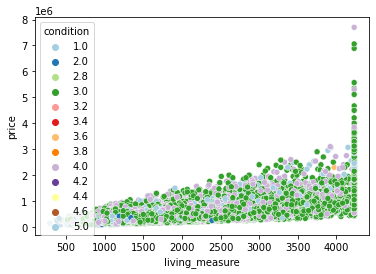

In [69]:
sns.scatterplot(df_final['living_measure'],df_final['price'],hue=df_final['condition'],palette='Paired',legend='full')

### Bivariate : Price : Lot Measure

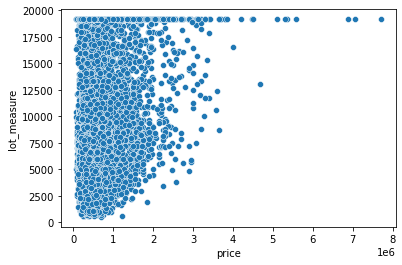

In [70]:
sns.scatterplot(df_final["price"],df_final["lot_measure"]);

### Bivariate : Price : Ceil

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.1'),
  Text(2, 0, '1.2'),
  Text(3, 0, '1.3'),
  Text(4, 0, '1.4'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.6'),
  Text(7, 0, '1.7'),
  Text(8, 0, '1.8'),
  Text(9, 0, '1.9'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.2'),
  Text(12, 0, '2.5'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.5')])

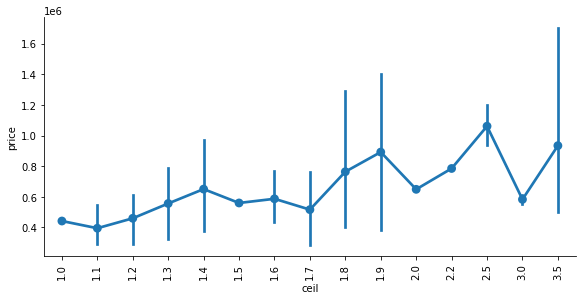

In [71]:
sns.factorplot(x='ceil',y='price',data=df_final, size=4, aspect=2)
plt.xticks(rotation=90)

### Bivariate : Price : Coast

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '0.4'), Text(2, 0, '1.0')])

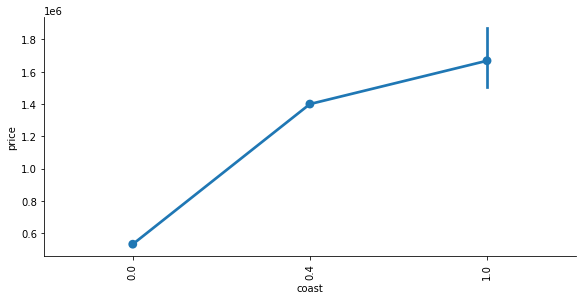

In [72]:
sns.factorplot(x='coast',y='price',data=df_final, size=4, aspect=2)
plt.xticks(rotation=90)

### Bivariate : Price : Sight

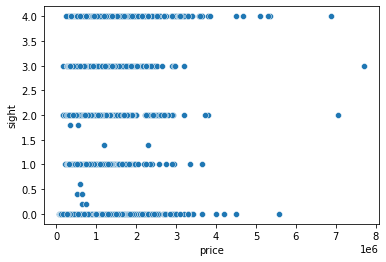

In [73]:
sns.scatterplot(df_final["price"],df_final["sight"]);

### Bivariate : Price : Condition

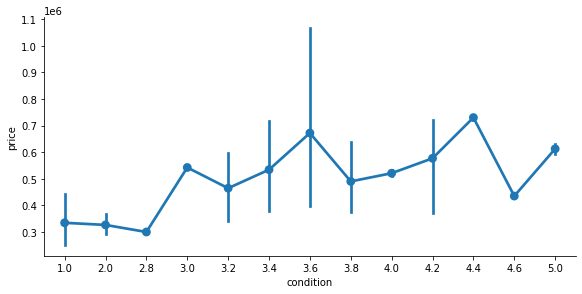

In [74]:
sns.factorplot(x='condition',y='price',data=df_final, size=4, aspect=2)

### Bivariate : Price : Quality

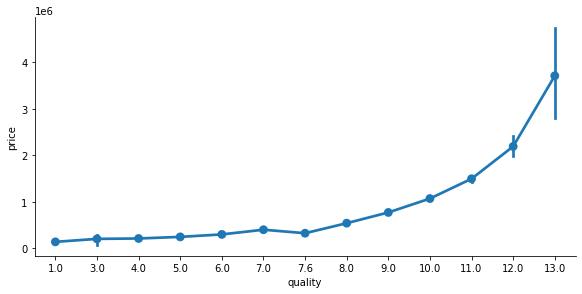

In [75]:
sns.factorplot(x='quality',y='price',data=df_final, size=4, aspect=2)

### Bivariate : Price : Ceil_Measure

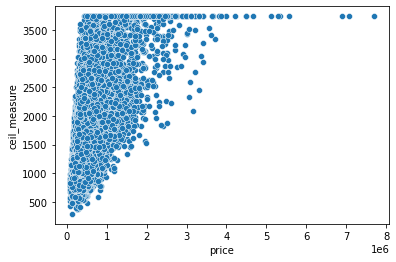

In [76]:
sns.scatterplot(df_final["price"],df_final["ceil_measure"]);

### Bivariate : Price : Basement

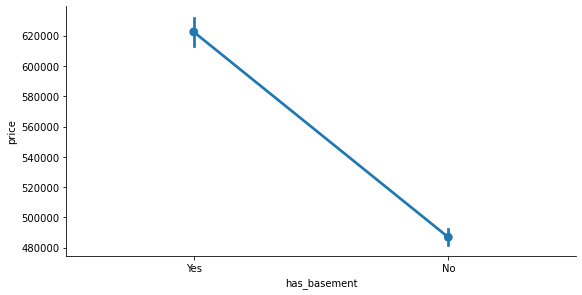

In [77]:
sns.factorplot(x='has_basement',y='price',data=df_final, size = 4, aspect = 2)

<AxesSubplot:xlabel='living_measure', ylabel='price'>

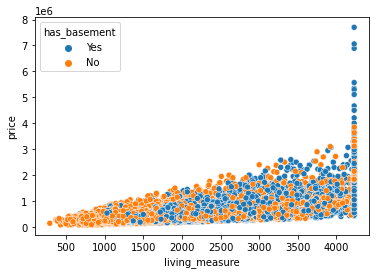

In [78]:
sns.scatterplot(df_final['living_measure'],df_final['price'],hue=df_final['has_basement'])

### Bivariate : Price : Living_Measure15

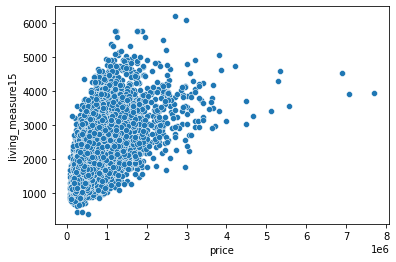

In [79]:
sns.scatterplot(df_final["price"],df_final["living_measure15"]);

### Bivariate : Price : Lot_Measure15

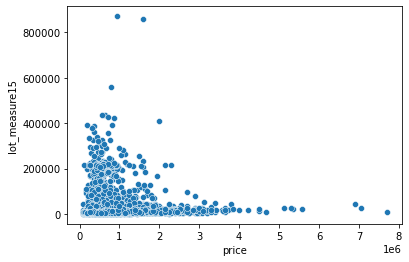

In [80]:
sns.scatterplot(df_final["price"],df_final["lot_measure15"]);

In [81]:
df_final.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ...  basement  yr_built  living_measure15  \
0    0.0        3.0      8.0  ...    1250.0    1966.0            2020.0   
1    0.0        4.0      6.0  ...       0.0    1948.0            1660.0   
2    4.0        3.0      8.0  ...       0.0    1966.0            2620.0   
3    0.0        3.0      8.0  ...       0.0    2009.0            2030.0   
4    0.0        3.0      7.0  ...       0.0    1924.0            1120.0   

   lot_measure15  furnished  total_area      city has_basement     month_year  \
0         8660.0        0.0     12490.0  Kirkland          Yes     April-2015   
1         4100.0        0.0      3771.0   Seattle           No     March-2015   
2         2433.0        0.0      5455.0   Seattle           No    August-2014   
3         3794.0        0.0      5461.0    Auburn           No   October-2014   
4         5100.0        0.0      5710.0   Seattle           No  February-2015   

  has_renovated  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 21 columns]

In [82]:
df_final.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ...  basement  yr_built  living_measure15  \
0    0.0        3.0      8.0  ...    1250.0    1966.0            2020.0   
1    0.0        4.0      6.0  ...       0.0    1948.0            1660.0   
2    4.0        3.0      8.0  ...       0.0    1966.0            2620.0   
3    0.0        3.0      8.0  ...       0.0    2009.0            2030.0   
4    0.0        3.0      7.0  ...       0.0    1924.0            1120.0   

   lot_measure15  furnished  total_area      city has_basement     month_year  \
0         8660.0        0.0     12490.0  Kirkland          Yes     April-2015   
1         4100.0        0.0      3771.0   Seattle           No     March-2015   
2         2433.0        0.0      5455.0   Seattle           No    August-2014   
3         3794.0        0.0      5461.0    Auburn           No   October-2014   
4         5100.0        0.0      5710.0   Seattle           No  February-2015   

  has_renovated  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 21 columns]

In [83]:
df_final.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'city', 'has_basement', 'month_year',
       'has_renovated'],
      dtype='object')

In [84]:
df_model = df_final.copy()

In [85]:
df_model.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ...  basement  yr_built  living_measure15  \
0    0.0        3.0      8.0  ...    1250.0    1966.0            2020.0   
1    0.0        4.0      6.0  ...       0.0    1948.0            1660.0   
2    4.0        3.0      8.0  ...       0.0    1966.0            2620.0   
3    0.0        3.0      8.0  ...       0.0    2009.0            2030.0   
4    0.0        3.0      7.0  ...       0.0    1924.0            1120.0   

   lot_measure15  furnished  total_area      city has_basement     month_year  \
0         8660.0        0.0     12490.0  Kirkland          Yes     April-2015   
1         4100.0        0.0      3771.0   Seattle           No     March-2015   
2         2433.0        0.0      5455.0   Seattle           No    August-2014   
3         3794.0        0.0      5461.0    Auburn           No   October-2014   
4         5100.0        0.0      5710.0   Seattle           No  February-2015   

  has_renovated  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 21 columns]

In [86]:
df_model.shape

(21613, 21)

In [87]:
df_model['room_bed'].value_counts()

3.0    9781
4.0    6862
2.0    2748
5.0    1595
5.5     332
1.5     210
3.6      17
3.8      15
3.2      14
3.4      10
2.8       9
2.6       7
2.2       4
2.4       3
4.2       2
4.6       1
5.4       1
4.4       1
5.2       1
Name: room_bed, dtype: int64

In [88]:
df_model1 = pd.get_dummies(df_model, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished','city', 
                                        'has_basement', 'has_renovated'],drop_first=True)

In [89]:
df_model1.shape

(21613, 165)

In [90]:
df_model1.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'month_year',
       ...
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Snoqualmie', 'city_Vashon', 'city_Woodinville',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object', length=165)

In [91]:
df_model1.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000           670.0       3101.0         670.0       0.0    1948.0   
2  735000          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000          1120.0       4590.0        1120.0       0.0    1924.0   

   living_measure15  lot_measure15  total_area     month_year  ...  \
0            2020.0         8660.0     12490.0     April-2015  ...   
1            1660.0         4100.0      3771.0     March-2015  ...   
2            2620.0         2433.0      5455.0    August-2014  ...   
3            2030.0         3794.0      5461.0   October-2014  ...   
4            1120.0         5100.0      5710.0  February-2015  ...   

   city_North Bend  city_Redmond  city_Renton  city_Sammamish  city_Seattle  \
0                0             0            0               0             0   
1                0             0            0               0             1   
2                0             0            0               0             1   
3                0             0            0               0             0   
4                0             0            0               0             1   

   city_Snoqualmie  city_Vashon  city_Woodinville  has_basement_Yes  \
0                0            0                 0                 1   
1                0            0                 0                 0   
2                0            0                 0                 0   
3                0            0                 0                 0   
4                0            0                 0                 0   

   has_renovated_Yes  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 165 columns]

In [92]:
df_model1=df_model1.drop(['month_year'],axis=1)

In [93]:
#Creating X, y for training and testing set
X = df_model1.drop("price" , axis=1)
y = df_model1["price"]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(13832, 163)
(4323, 163)
(3458, 163)


In [96]:
df_model1.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000           670.0       3101.0         670.0       0.0    1948.0   
2  735000          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000          1120.0       4590.0        1120.0       0.0    1924.0   

   living_measure15  lot_measure15  total_area  room_bed_2.0  ...  \
0            2020.0         8660.0     12490.0             0  ...   
1            1660.0         4100.0      3771.0             1  ...   
2            2620.0         2433.0      5455.0             0  ...   
3            2030.0         3794.0      5461.0             0  ...   
4            1120.0         5100.0      5710.0             1  ...   

   city_North Bend  city_Redmond  city_Renton  city_Sammamish  city_Seattle  \
0                0             0            0               0             0   
1                0             0            0               0             1   
2                0             0            0               0             1   
3                0             0            0               0             0   
4                0             0            0               0             1   

   city_Snoqualmie  city_Vashon  city_Woodinville  has_basement_Yes  \
0                0            0                 0                 1   
1                0            0                 0                 0   
2                0            0                 0                 0   
3                0            0                 0                 0   
4                0            0                 0                 0   

   has_renovated_Yes  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 164 columns]

In [97]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [98]:
LR = LinearRegression()
LR.fit(X_train, y_train)
#predicting result over test data
LR_y_predict= LR.predict(X_train)
LR_y_predvl= LR.predict(X_val)

LR.coef_

array([-4.71476335e+01, -4.90837846e+00,  1.68348301e+02,  1.36534329e+02,
       -1.83882461e+03,  4.27017875e+01, -8.90027043e-02,  3.40959699e-01,
        1.14184674e+04,  5.40230579e+04, -6.97295528e+04, -1.64682822e+04,
        3.57482502e+04, -2.75924969e+03, -1.31535751e+04, -5.01453489e+04,
       -4.47661667e+04, -4.10005186e+03, -2.19951527e+04, -5.03796387e+04,
       -9.45874490e-09, -5.00684134e+04, -2.61733024e+04,  3.01224645e-09,
        7.97683878e+04, -1.02001836e+05, -1.42675538e+04,  6.46594122e+04,
        9.41277467e+04,  1.74908010e+05,  1.50693846e+05,  1.99708103e+05,
       -1.05890263e+05,  4.42437486e+04,  6.90800399e+04,  8.29695828e+04,
        8.66151402e+04, -9.10308008e+04,  4.13274392e-09,  5.51179447e+04,
        9.54885118e+04,  1.08013543e+05,  8.58782573e+04,  5.41000837e+04,
        2.18780579e+05,  1.05487040e+05,  1.32754832e+05,  8.89324067e+04,
        1.22469274e+04,  1.35536569e+05,  1.06457643e+05,  1.01682589e+05,
        9.04496516e+04,  

In [99]:
LR_trscore=r2_score(y_train,LR_y_predict)
LR_trRMSE=np.sqrt(mean_squared_error(y_train, LR_y_predict))
LR_trMSE=mean_squared_error(y_train, LR_y_predict)
LR_trMAE=mean_absolute_error(y_train, LR_y_predict)

LR_vlscore=r2_score(y_val,LR_y_predvl)
LR_vlRMSE=np.sqrt(mean_squared_error(y_val, LR_y_predvl))
LR_vlMSE=mean_squared_error(y_val, LR_y_predvl)
LR_vlMAE=mean_absolute_error(y_val, LR_y_predvl)

model_comp=pd.DataFrame({'Method':['Linear Reg Model'],'Test Score':LR_vlscore,'RMSE_vl': LR_vlRMSE, 'MSE_vl': LR_vlMSE, 'MAE_vl': LR_vlMAE,'Train Score':LR_trscore,'RMSE_tr': LR_trRMSE, 'MSE_tr': LR_trMSE, 'MAE_tr': LR_trMAE})

In [100]:
model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949

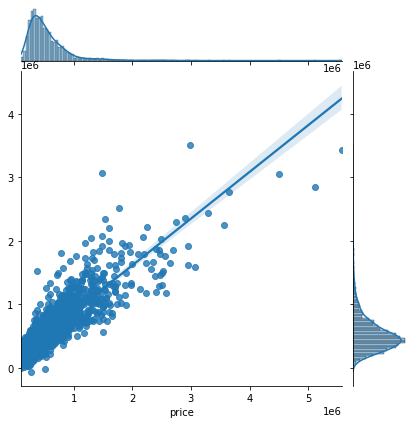

In [101]:
sns.jointplot(x=y_val, y=LR_y_predvl, kind="reg")

### KNN

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
knn = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn.fit(X_train, y_train)

#predicting result over test data
knn_y_predict= knn.predict(X_train)
knn_y_predvl= knn.predict(X_val)

In [104]:
knn_trscore=r2_score(y_train,knn_y_predict)
knn_trRMSE=np.sqrt(mean_squared_error(y_train, knn_y_predict))
knn_trMSE=mean_squared_error(y_train, knn_y_predict)
knn_trMAE=mean_absolute_error(y_train, knn_y_predict)

knn_vlscore=r2_score(y_val,knn_y_predvl)
knn_vlRMSE=np.sqrt(mean_squared_error(y_val,knn_y_predvl))
knn_vlMSE=mean_squared_error(y_val,knn_y_predvl)
knn_vlMAE=mean_absolute_error(y_val,knn_y_predvl)

knn_df=pd.DataFrame({'Method':['knn'],'Test Score':knn_vlscore,'RMSE_vl': knn_vlRMSE, 'MSE_vl': knn_vlMSE, 'MAE_vl': knn_vlMAE,'Train Score':knn_trscore,'RMSE_tr': knn_trRMSE, 'MSE_tr': knn_trMSE, 'MAE_tr': knn_trMAE})
model_comp = pd.concat([model_comp, knn_df])



In [105]:
model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802

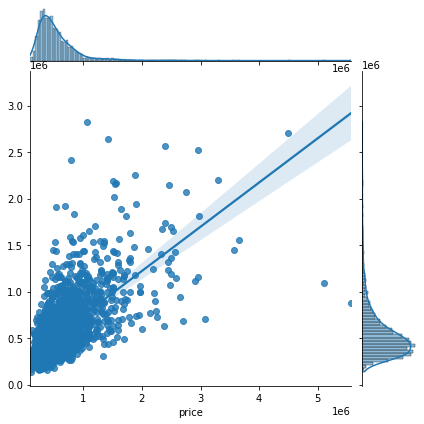

In [106]:
sns.jointplot(x=y_val, y=knn_y_predvl, kind="reg")

In [107]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Lasso

In [108]:
Lasso = Lasso(alpha=1)
Lasso.fit(X_train, y_train)

#predicting result over test data
Lasso_y_predict= Lasso.predict(X_train)
Lasso_y_predvl= Lasso.predict(X_val)

Lasso.coef_


array([-4.74442771e+01, -4.90279276e+00,  1.68427663e+02,  1.36773874e+02,
       -1.83789814e+03,  4.27331022e+01, -8.88556174e-02,  3.40992886e-01,
        1.50428152e+04,  5.44633624e+04, -5.92644231e+04, -0.00000000e+00,
        3.14304293e+04,  1.09660064e+03, -6.51857374e+02, -2.81410625e+04,
       -3.15702576e+04, -0.00000000e+00, -1.80260440e+04, -4.67879077e+04,
        0.00000000e+00, -3.22524749e+04, -2.21749090e+04,  0.00000000e+00,
        7.35618288e+04, -9.80214383e+04, -7.75943063e+04, -3.52035257e+03,
        2.43878950e+04,  8.19107659e+04,  7.98230687e+04,  1.19565046e+05,
       -1.45031802e+05, -1.47269167e+04, -0.00000000e+00,  1.30990369e+04,
        2.82023079e+03, -1.11288322e+05,  0.00000000e+00, -0.00000000e+00,
        2.55820698e+04,  2.42640114e+04,  0.00000000e+00, -1.68039449e+04,
        1.39613339e+05,  3.55582208e+04,  5.26244810e+04,  0.00000000e+00,
       -6.21728321e+04,  6.44741514e+04,  3.65624486e+04,  2.79848824e+04,
        8.51175301e+03, -

In [109]:
Lasso_trscore=r2_score(y_train,Lasso_y_predict)
Lasso_trRMSE=np.sqrt(mean_squared_error(y_train, Lasso_y_predict))
Lasso_trMSE=mean_squared_error(y_train,Lasso_y_predict)
Lasso_trMAE=mean_absolute_error(y_train,Lasso_y_predict)

Lasso_vlscore=r2_score(y_val,Lasso_y_predvl)
Lasso_vlRMSE=np.sqrt(mean_squared_error(y_val, Lasso_y_predvl))
Lasso_vlMSE=mean_squared_error(y_val,Lasso_y_predvl)
Lasso_vlMAE=mean_absolute_error(y_val,Lasso_y_predvl)

Lasso_df=pd.DataFrame({'Method':['Linear-Reg Lasso'],'Test Score':Lasso_vlscore,'RMSE_vl': Lasso_vlRMSE, 'MSE_vl': Lasso_vlMSE, 'MAE_vl': Lasso_vlMAE,'Train Score':Lasso_trscore,'RMSE_tr': Lasso_trRMSE, 'MSE_tr': Lasso_trMSE, 'MAE_tr': Lasso_trMAE})
model_comp = pd.concat([model_comp, Lasso_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593

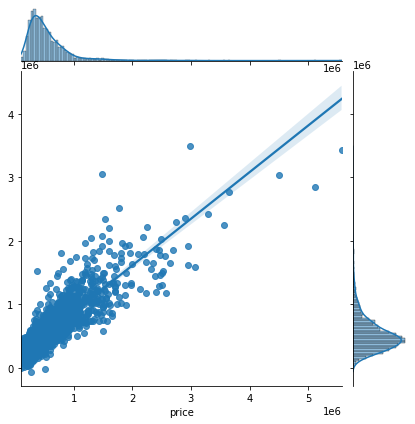

In [110]:
sns.jointplot(x=y_val, y=Lasso_y_predvl, kind="reg")

### Ridge Model

In [111]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)

#predicting result over test data
Ridge_y_predict= Ridge.predict(X_train)
Ridge_y_predvl= Ridge.predict(X_val)

Ridge.coef_

array([-5.39611826e+01, -4.90574048e+00,  1.75960517e+02,  1.43790255e+02,
       -1.83105067e+03,  4.29737620e+01, -8.84545556e-02,  3.39351482e-01,
        1.85997764e+04,  4.93169888e+04, -5.79281886e+04,  3.32237910e+02,
        1.73740020e+04,  4.61344150e+03, -1.21494305e+04, -5.53082949e+04,
       -3.43396721e+04, -1.17461639e+04, -1.46625042e+04, -5.20906406e+04,
        0.00000000e+00, -2.91037709e+04, -1.80782825e+04,  0.00000000e+00,
        4.98609968e+04, -9.37708711e+04, -1.27598951e+05, -7.71519454e+04,
       -5.09143434e+04,  1.76915395e+04,  7.11575764e+03,  4.26574678e+04,
       -1.28664145e+05, -7.07448443e+04, -5.06904957e+04, -6.23731764e+04,
       -3.88923966e+04, -5.86312367e+04,  0.00000000e+00, -4.51859366e+04,
       -5.01604034e+04, -2.45137144e+04, -4.62818332e+04, -7.48931693e+04,
        6.74170494e+04, -4.02800381e+04, -9.78781531e+03, -3.88137460e+04,
       -8.42575340e+04,  7.11558314e+03, -3.93225941e+04, -3.09169456e+04,
       -3.74056718e+04, -

In [112]:
Ridge_trscore=r2_score(y_train,Ridge_y_predict)
Ridge_trRMSE=np.sqrt(mean_squared_error(y_train,Ridge_y_predict))
Ridge_trMSE=mean_squared_error(y_train,Ridge_y_predict)
Ridge_trMAE=mean_absolute_error(y_train,Ridge_y_predict)

Ridge_vlscore=r2_score(y_val,Ridge_y_predvl)
Ridge_vlRMSE=np.sqrt(mean_squared_error(y_val,Ridge_y_predvl))
Ridge_vlMSE=mean_squared_error(y_val,Ridge_y_predvl)
Ridge_vlMAE=mean_absolute_error(y_val,Ridge_y_predvl)

Ridge_df=pd.DataFrame({'Method':['Linear-Reg Ridge'],'Test Score':Ridge_vlscore,'RMSE_vl': Ridge_vlRMSE, 'MSE_vl': Ridge_vlMSE, 'MAE_vl': Ridge_vlMAE,'Train Score':Ridge_trscore,'RMSE_tr': Ridge_trRMSE, 'MSE_tr': Ridge_trMSE, 'MAE_tr': Ridge_trMAE})
model_comp = pd.concat([model_comp, Ridge_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644

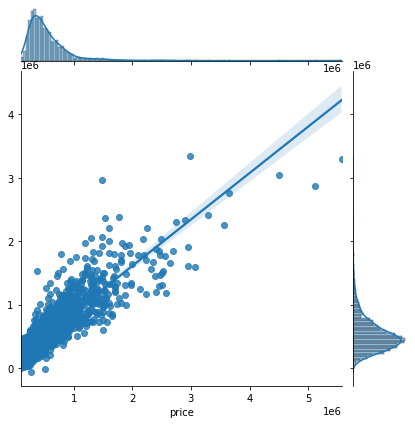

In [113]:
sns.jointplot(x=y_val, y=Ridge_y_predvl, kind="reg")

### Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_vlscore=r2_score(y_val,y_DT1_predvl)
DT1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vlMSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vlMAE=mean_absolute_error(y_val, y_DT1_predvl)

DT1_df=pd.DataFrame({'Method':['DT1'],'Test Score':DT1_vlscore,'RMSE_vl': DT1_vlRMSE, 'MSE_vl': DT1_vlMSE, 'MAE_vl': DT1_vlMAE,'Train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE})
model_comp = pd.concat([model_comp, DT1_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   
0               DT1    0.636124  228691.935244  5.230000e+10  126570.142279   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644  
0     0.999390    8849.087482  7.830635e+07     765.360758

In [116]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)

DT2_vlscore=r2_score(y_val,y_DT2_predvl)
DT2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT2_predvl))
DT2_vlMSE=mean_squared_error(y_val, y_DT2_predvl)
DT2_vlMAE=mean_absolute_error(y_val, y_DT2_predvl)

DT2_df=pd.DataFrame({'Method':['DT2'],'Test Score':DT2_vlscore,'RMSE_vl': DT2_vlRMSE, 'MSE_vl': DT2_vlMSE, 'MAE_vl': DT2_vlMAE,'Train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE})
model_comp = pd.concat([model_comp, DT2_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   
0               DT1    0.636124  228691.935244  5.230000e+10  126570.142279   
0               DT2    0.673706  216560.232152  4.689833e+10  121029.305903   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644  
0     0.999390    8849.087482  7.830635e+07     765.360758  
0     0.824298  150201.175578  2.256039e+10   98459.347607

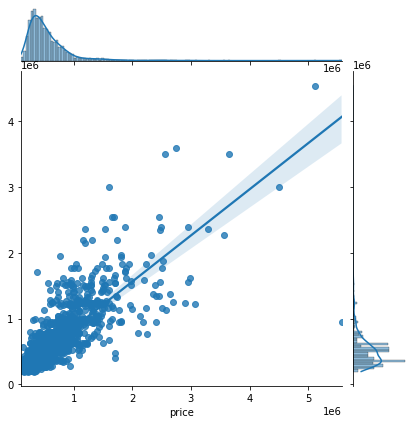

In [117]:
sns.jointplot(x=y_val, y=y_DT2_predvl, kind="reg")

### Ensemble Techniques

In [118]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [119]:
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_vlscore=r2_score(y_val,y_GB1_predvl)
GB1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vlMSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vlMAE=mean_absolute_error(y_val, y_GB1_predvl)

GB1_df=pd.DataFrame({'Method':['GB1'],'Test Score':GB1_vlscore,'RMSE_vl': GB1_vlRMSE, 'MSE_vl': GB1_vlMSE, 'MAE_vl': GB1_vlMAE,'Train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE})
model_comp = pd.concat([model_comp, GB1_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   
0               DT1    0.636124  228691.935244  5.230000e+10  126570.142279   
0               DT2    0.673706  216560.232152  4.689833e+10  121029.305903   
0               GB1    0.797980  170400.605217  2.903637e+10  100184.728099   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644  
0     0.999390    8849.087482  7.830635e+07     765.360758  
0     0.824298  150201.175578  2.256039e+10   98459.347607  
0     0.866438  130956.113351  1.714950e+10   88198.683108

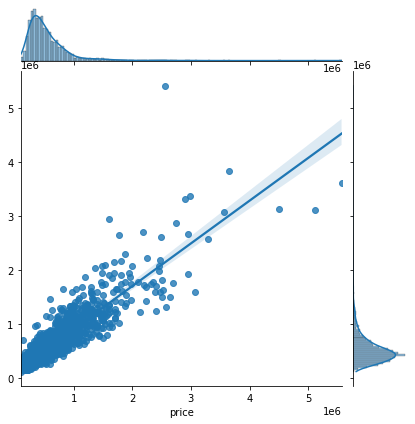

In [120]:
sns.jointplot(x=y_val, y=y_GB1_predvl, kind="reg")

In [121]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_vlscore=r2_score(y_val,y_BGG1_predvl)
BGG1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_BGG1_predvl))
BGG1_vlMSE=mean_squared_error(y_val, y_BGG1_predvl)
BGG1_vlMAE=mean_absolute_error(y_val, y_BGG1_predvl)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'Test Score':BGG1_vlscore,'RMSE_vl': BGG1_vlRMSE, 'MSE_vl':BGG1_vlMSE, 'MAE_vl': BGG1_vlMAE,'Train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE})
model_comp = pd.concat([model_comp, BGG1_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   
0               DT1    0.636124  228691.935244  5.230000e+10  126570.142279   
0               DT2    0.673706  216560.232152  4.689833e+10  121029.305903   
0               GB1    0.797980  170400.605217  2.903637e+10  100184.728099   
0              BGG1    0.788226  174465.894577  3.043835e+10   94024.454331   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644  
0     0.999390    8849.087482  7.830635e+07     765.360758  
0     0.824298  150201.175578  2.256039e+10   98459.347607  
0     0.866438  130956.113351  1.714950e+10   88198.683108  
0     0.970082   61979.635716  3.841475e+09   34215.014366

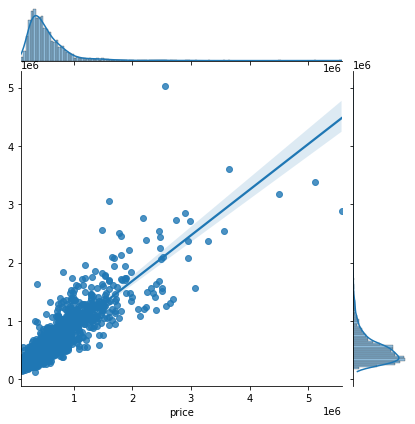

In [122]:
sns.jointplot(x=y_val, y=y_BGG1_predvl, kind="reg")

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)

RF1_vlscore=r2_score(y_val,y_RF1_predvl)
RF1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vlMSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vlMAE=mean_absolute_error(y_val, y_RF1_predvl)

RF1_df=pd.DataFrame({'Method':['RF1'],'Test Score':RF1_vlscore,'RMSE_vl': RF1_vlRMSE, 'MSE_vl':RF1_vlMSE, 'MAE_vl': RF1_vlMAE,'Train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE})
model_comp = pd.concat([model_comp, RF1_df])

model_comp

Method  Test Score        RMSE_vl        MSE_vl         MAE_vl  \
0  Linear Reg Model    0.753222  188333.393773  3.546947e+10  114914.127937   
0               knn    0.449068  281399.520291  7.918569e+10  167089.593902   
0  Linear-Reg Lasso    0.753539  188212.262916  3.542386e+10  114852.075125   
0  Linear-Reg Ridge    0.753831  188100.853862  3.538193e+10  114888.179417   
0               DT1    0.636124  228691.935244  5.230000e+10  126570.142279   
0               DT2    0.673706  216560.232152  4.689833e+10  121029.305903   
0               GB1    0.797980  170400.605217  2.903637e+10  100184.728099   
0              BGG1    0.788226  174465.894577  3.043835e+10   94024.454331   
0               RF1    0.798564  170154.146762  2.895243e+10   93401.308710   

   Train Score        RMSE_tr        MSE_tr         MAE_tr  
0     0.763917  174107.382851  3.031338e+10  108837.529949  
0     0.999390    8849.087482  7.830635e+07     765.360802  
0     0.763865  174126.576158  3.032006e+10  108895.185593  
0     0.763692  174190.376094  3.034229e+10  109021.122644  
0     0.999390    8849.087482  7.830635e+07     765.360758  
0     0.824298  150201.175578  2.256039e+10   98459.347607  
0     0.866438  130956.113351  1.714950e+10   88198.683108  
0     0.970082   61979.635716  3.841475e+09   34215.014366  
0     0.972863   59029.479369  3.484479e+09   33644.006450

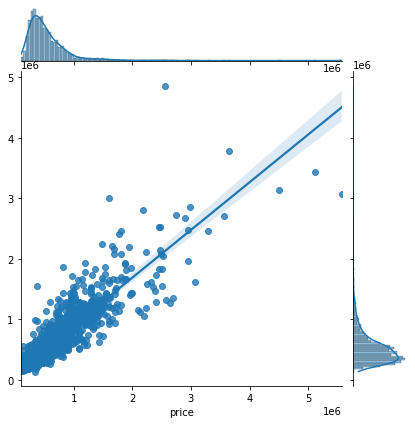

In [125]:
sns.jointplot(x=y_val, y=y_RF1_predvl, kind="reg")

First 20 feature importance:	 Imp    90.976
dtype: float64
First 30 feature importance:	 Imp    94.948
dtype: float64


<Figure size 864x432 with 0 Axes>

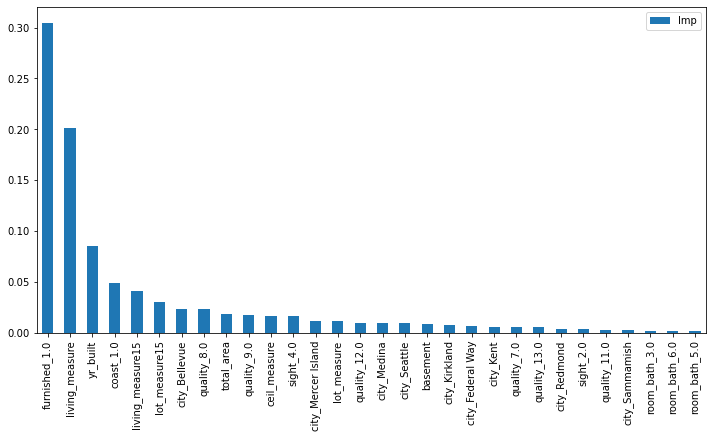

In [126]:
#feature importance
import matplotlib.pyplot as plt
plotSizeX = 12
plotSizeY = 6
plt.figure(figsize=(plotSizeX, plotSizeY))

rf_imp_feature_1=pd.DataFrame(RF1.feature_importances_, columns = ["Imp"], index = X_val.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

rf_imp_feature_1[:30].plot.bar(figsize=(plotSizeX, plotSizeY))

#First 20 features have an importance of 90.5% and first 30 have importance of 95.15
print("First 20 feature importance:\t",(rf_imp_feature_1[:20].sum())*100)
print("First 30 feature importance:\t",(rf_imp_feature_1[:30].sum())*100)

In [127]:
rf_imp_feature_1[:30]

Imp
furnished_1.0       0.30477
living_measure      0.20137
yr_built            0.08575
coast_1.0           0.04929
living_measure15    0.04149
lot_measure15       0.03041
city_Bellevue       0.02408
quality_8.0         0.02386
total_area          0.01897
quality_9.0         0.01806
ceil_measure        0.01730
sight_4.0           0.01652
city_Mercer Island  0.01238
lot_measure         0.01164
quality_12.0        0.01021
city_Medina         0.01018
city_Seattle        0.00966
basement            0.00915
city_Kirkland       0.00785
city_Federal Way    0.00682
city_Kent           0.00624
quality_7.0         0.00620
quality_13.0        0.00612
city_Redmond        0.00439
sight_2.0           0.00394
quality_11.0        0.00281
city_Sammamish      0.00281
room_bath_3.0       0.00250
room_bath_6.0       0.00247
room_bath_5.0       0.00224

In [128]:
from sklearn.pipeline import Pipeline

In [129]:
def result (model,pipe_model,X_train_set,y_train_set,X_val_set,y_val_set):
    pipe_model.fit(X_train_set,y_train_set)
    #predicting result over test data
    y_train_predict= pipe_model.predict(X_train_set)
    y_val_predict= pipe_model.predict(X_val_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    vlscore=r2_score(y_val,y_val_predict)
    vlRMSE=np.sqrt(mean_squared_error(y_val,y_val_predict))
    vlMSE=mean_squared_error(y_val,y_val_predict)
    vlMAE=mean_absolute_error(y_val,y_val_predict)
    result_df=pd.DataFrame({'Method':[model],'Test score':vlscore,'RMSE_val':vlRMSE,'MSE_val':vlMSE,'MSE_vl': vlMSE,
                          'Train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})  
    return result_df

In [130]:
#Creating empty dataframe to capture results
result_dff=pd.DataFrame()
pipe_LR = Pipeline([('LR', LinearRegression())])
result_dff=pd.concat([result_dff,result('LR',pipe_LR,X_train,y_train,X_val,y_val)])

pipe_knr = Pipeline([('KNNR', KNeighborsRegressor(n_neighbors=4,weights='distance'))])
result_dff=pd.concat([result_dff,result('KNNR',pipe_knr,X_train,y_train,X_val,y_val)])

pipe_DTR = Pipeline([('DTR', DecisionTreeRegressor())])
result_dff=pd.concat([result_dff,result('DTR',pipe_DTR,X_train,y_train,X_val,y_val)])

pipe_GBR = Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22))])
result_dff=pd.concat([result_dff,result('GBR',pipe_GBR,X_train,y_train,X_val,y_val)])

pipe_BGR = Pipeline([('BGR', BaggingRegressor(n_estimators=50, oob_score= True,random_state=14))])
result_dff=pd.concat([result_dff,result('BGR',pipe_BGR,X_train,y_train,X_val,y_val)])

pipe_RFR = Pipeline([('RFR', RandomForestRegressor())])
result_dff=pd.concat([result_dff,result('RFR',pipe_RFR,X_train,y_train,X_val,y_val)])

result_dff

Method  Test score       RMSE_val       MSE_val        MSE_vl  Train Score  \
0     LR    0.753222  188333.393773  3.546947e+10  3.546947e+10     0.763917   
0   KNNR    0.449068  281399.520291  7.918569e+10  7.918569e+10     0.999390   
0    DTR    0.617173  234571.679797  5.502387e+10  5.502387e+10     0.999390   
0    GBR    0.797980  170400.605217  2.903637e+10  2.903637e+10     0.866438   
0    BGR    0.788226  174465.894577  3.043835e+10  3.043835e+10     0.970082   
0    RFR    0.793063  172462.159230  2.974320e+10  2.974320e+10     0.970548   

         RMSE_tr        MSE_tr         MAE_tr  
0  174107.382851  3.031338e+10  108837.529949  
0    8849.087482  7.830635e+07     765.360802  
0    8849.087482  7.830635e+07     765.360758  
0  130956.113351  1.714950e+10   88198.683108  
0   61979.635716  3.841475e+09   34215.014366  
0   61495.092956  3.781646e+09   33843.504240

In [131]:
result_ds1=result_dff.copy()
result_ds1

Method  Test score       RMSE_val       MSE_val        MSE_vl  Train Score  \
0     LR    0.753222  188333.393773  3.546947e+10  3.546947e+10     0.763917   
0   KNNR    0.449068  281399.520291  7.918569e+10  7.918569e+10     0.999390   
0    DTR    0.617173  234571.679797  5.502387e+10  5.502387e+10     0.999390   
0    GBR    0.797980  170400.605217  2.903637e+10  2.903637e+10     0.866438   
0    BGR    0.788226  174465.894577  3.043835e+10  3.043835e+10     0.970082   
0    RFR    0.793063  172462.159230  2.974320e+10  2.974320e+10     0.970548   

         RMSE_tr        MSE_tr         MAE_tr  
0  174107.382851  3.031338e+10  108837.529949  
0    8849.087482  7.830635e+07     765.360802  
0    8849.087482  7.830635e+07     765.360758  
0  130956.113351  1.714950e+10   88198.683108  
0   61979.635716  3.841475e+09   34215.014366  
0   61495.092956  3.781646e+09   33843.504240

### PCA

In [132]:
df_model1.shape

(21613, 164)

In [133]:
df_model1.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'room_bed_2.0',
       ...
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Snoqualmie', 'city_Vashon', 'city_Woodinville',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object', length=164)

In [134]:
df_pca = df_model1.drop(['price'], axis = 1)

In [135]:
numerical_cols = df_pca.copy()

numerical_cols.shape

(21613, 163)

In [136]:
from scipy.stats import zscore

In [137]:
numerical_cols =  numerical_cols.apply(zscore)      

cov_matrix = np.cov(numerical_cols.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00004627  0.34831047  0.86880718 ...  0.08365247  0.20480261
   0.05396172]
 [ 0.34831047  1.00004627  0.32051739 ...  0.20170416 -0.02586149
   0.02545537]
 [ 0.86880718  0.32051739  1.00004627 ...  0.09871579 -0.22473695
   0.02337721]
 ...
 [ 0.08365247  0.20170416  0.09871579 ...  1.00004627 -0.0265895
  -0.01404383]
 [ 0.20480261 -0.02586149 -0.22473695 ... -0.0265895   1.00004627
   0.04898558]
 [ 0.05396172  0.02545537  0.02337721 ... -0.01404383  0.04898558
   1.00004627]]


In [138]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.34530894 -0.16381197  0.0877856  ...  0.00690839  0.00174209
  -0.00150082]
 [-0.14827592 -0.18165147 -0.38092739 ...  0.00787322 -0.00189882
  -0.00485684]
 [-0.34984589  0.02862438 -0.03056599 ...  0.00494877  0.0030612
   0.00191   ]
 ...
 [-0.04917487 -0.00523134 -0.10762395 ...  0.00759805  0.03542121
   0.0216834 ]
 [ 0.00817371 -0.3410824   0.27164959 ... -0.00260831 -0.00140682
  -0.00644115]
 [-0.00215736 -0.08601004  0.04165576 ... -0.00190919 -0.03579296
  -0.03339723]]

 Eigen Values 
%s [6.56634891e+00 3.24292905e+00 2.57286789e+00 2.30823810e+00
 2.05747572e+00 2.00686761e+00 1.86716438e+00 1.83894735e+00
 1.79544563e+00 5.68094215e-03 1.24976925e-02 1.72625870e+00
 1.70911140e+00 1.69072461e+00 1.65931587e+00 1.63908525e+00
 1.60722414e+00 1.56745656e+00 5.05085458e-02 1.22350907e-01
 2.65798199e-03 4.45274216e-04 9.70739428e-05 4.22690690e-05
 1.94104623e-01 2.05592097e-01 2.18336297e-01 2.22513781e-01
 7.32138252e-17 1.52909355e+00 1.50729071e+00

In [139]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(6.566348906031831, array([-3.45308939e-01, -1.48275920e-01, -3.49845887e-01, -4.89035326e-02,
       -2.27077566e-01, -3.21743199e-01, -9.49871787e-02, -9.50737702e-02,
        1.44533626e-01,  4.63455838e-03,  8.02387112e-04,  7.85709387e-03,
        6.71003508e-03,  9.76986470e-02,  2.81443184e-03,  4.51149228e-03,
       -3.96501089e-03, -4.18283183e-03, -1.59201140e-01, -3.00531155e-03,
       -7.51724577e-03, -5.17007478e-03, -8.61299649e-02,  3.81795303e-03,
        2.83752494e-03, -3.35104126e-02,  4.94360131e-03,  2.38420187e-02,
        2.01083912e-01,  3.23690286e-03,  2.99826677e-03,  3.72452275e-03,
        3.78892855e-03,  4.32124729e-03,  4.96261594e-03,  7.12457655e-02,
        4.22201092e-03,  3.71057753e-03, -2.74842556e-05,  3.25099292e-04,
        7.63151918e-02,  3.97351795e-03,  1.39141814e-03,  3.63892596e-03,
       -1.35880051e-03,  5.68119596e-02,  1.84811466e-03,  3.23129498e-03,
        1.68639169e-03,  2.67319091e-03, -1.21911497e-02,  1.04823892e-03,
    

In [140]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  


cum_var_exp = np.cumsum(var_explained)  


In [141]:
print(len(var_explained))

print((cum_var_exp))

163
[0.04028249 0.06017683 0.07596057 0.09012088 0.10274285 0.11505435
 0.12650882 0.13779018 0.14880468 0.15939473 0.16987959 0.18025166
 0.19043104 0.20048631 0.21034612 0.21996198 0.22934248 0.23858924
 0.24781446 0.2569018  0.2659721  0.27497408 0.28376505 0.29239844
 0.30089004 0.30921647 0.31738454 0.32548782 0.33331477 0.34105285
 0.34874706 0.35633458 0.3637991  0.3711826  0.37844337 0.38566809
 0.39289124 0.40002712 0.4071018  0.41405562 0.42094657 0.42779352
 0.434612   0.44141979 0.44820226 0.45495544 0.46164519 0.4683106
 0.47494599 0.4815601  0.48813295 0.49468558 0.50119974 0.50768745
 0.51414213 0.52057759 0.52699924 0.53341284 0.53980565 0.54616675
 0.55251347 0.5588572  0.56517    0.57145771 0.57772246 0.58397119
 0.59019275 0.59639956 0.60260288 0.60879327 0.61497477 0.6211477
 0.62731786 0.63346522 0.63961121 0.64575208 0.65189029 0.65802685
 0.66416262 0.67029284 0.67641589 0.6825381  0.68865737 0.69476891
 0.70087035 0.70696792 0.71304834 0.71911803 0.72516487 0.73

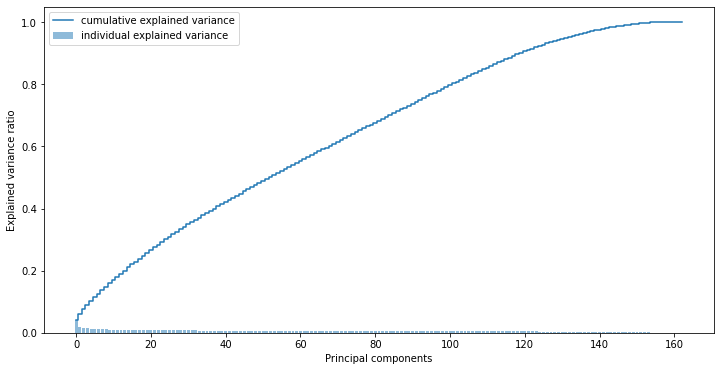

In [143]:
plt.figure(figsize=(plotSizeX, plotSizeY))
plt.bar(range(0,163), np.array(var_explained), alpha = 0.5, align='center', label='individual explained variance')
plt.step(range(0,163), np.array(cum_var_exp), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


In [144]:
predictors = [x for x in df_model1.columns if x not in ['price']]

def modelfit(alg, dxtrain, dytrain, printFeatureImportance=True):
    #feature importance
    alg.fit(dxtrain,dytrain)
    alg_imp_feature_1=pd.DataFrame(alg.feature_importances_, columns = ["Imp"], index = predictors)
    alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1['Imp'] = alg_imp_feature_1['Imp'].map('{0:.5f}'.format)
    alg_imp_feature_1=alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1.Imp=alg_imp_feature_1.Imp.astype("float")
    
    feat_30list=list(alg_imp_feature_1.index[:30])
    

    
    if printFeatureImportance:
        alg_imp_feature_1[:30].plot.bar(figsize=(plotSizeX, plotSizeY))
        #First 20 features have an importance of 90.5% and first 30 have importance of 95.15
        print("First 25 feature importance:\t",(alg_imp_feature_1[:25].sum())*100)
        print("First 30 feature importance:\t",(alg_imp_feature_1[:30].sum())*100)
        
    return feat_30list

First 25 feature importance:	 Imp    97.162
dtype: float64
First 30 feature importance:	 Imp    98.234
dtype: float64


['living_measure',
 'furnished_1.0',
 'yr_built',
 'coast_1.0',
 'living_measure15',
 'city_Bellevue',
 'sight_4.0',
 'quality_9.0',
 'quality_8.0',
 'city_Seattle',
 'lot_measure15',
 'quality_12.0',
 'city_Mercer Island',
 'city_Medina',
 'city_Kent',
 'sight_2.0',
 'city_Federal Way',
 'quality_13.0',
 'city_Kirkland',
 'ceil_measure',
 'quality_11.0',
 'quality_10.0',
 'total_area',
 'city_Redmond',
 'room_bath_5.0',
 'basement',
 'city_Sammamish',
 'quality_7.0',
 'quality_6.0',
 'city_Renton']

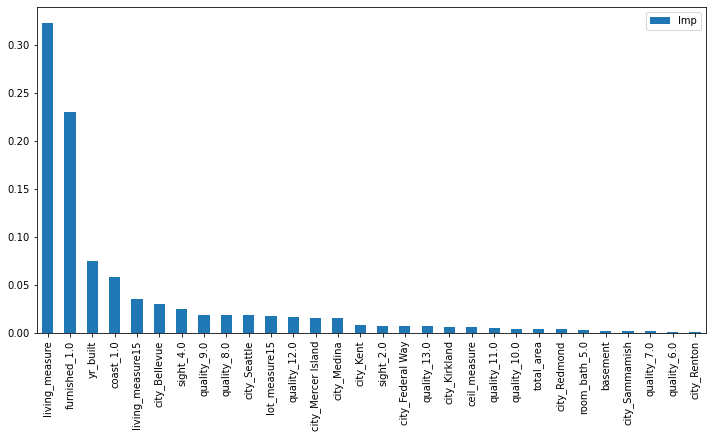

In [145]:
#Gradient boost model
modelfit(GB1,X_train,y_train)

First 25 feature importance:	 Imp    93.672
dtype: float64
First 30 feature importance:	 Imp    95.067
dtype: float64


['furnished_1.0',
 'living_measure',
 'yr_built',
 'coast_1.0',
 'living_measure15',
 'lot_measure15',
 'city_Bellevue',
 'quality_8.0',
 'total_area',
 'quality_9.0',
 'ceil_measure',
 'sight_4.0',
 'city_Mercer Island',
 'lot_measure',
 'city_Medina',
 'city_Seattle',
 'basement',
 'quality_12.0',
 'city_Kirkland',
 'city_Federal Way',
 'quality_7.0',
 'city_Kent',
 'quality_13.0',
 'sight_2.0',
 'city_Redmond',
 'room_bath_5.0',
 'city_Sammamish',
 'quality_11.0',
 'room_bath_3.0',
 'room_bath_6.0']

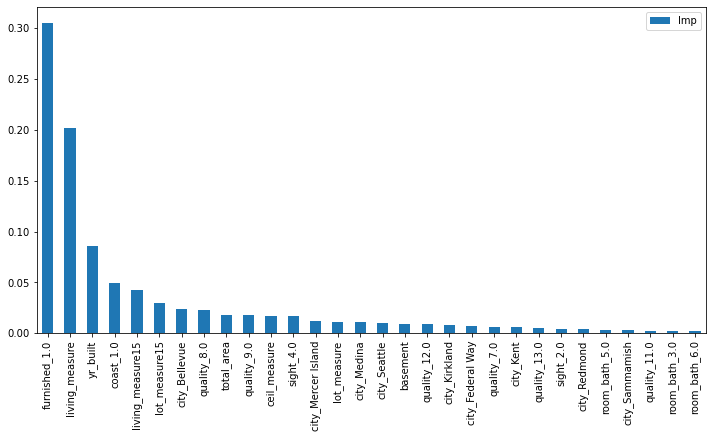

In [146]:
#Random Forest model
modelfit(RF1,X_train,y_train)

In [147]:
feat_list_GB1=modelfit(GB1,X_train,y_train, printFeatureImportance=False)
print(feat_list_GB1)

feat_list_RF1=modelfit(RF1,X_train,y_train, printFeatureImportance=False)
print(feat_list_RF1)

['living_measure', 'furnished_1.0', 'yr_built', 'coast_1.0', 'living_measure15', 'city_Bellevue', 'sight_4.0', 'quality_9.0', 'quality_8.0', 'city_Seattle', 'lot_measure15', 'quality_12.0', 'city_Mercer Island', 'city_Medina', 'city_Kent', 'sight_2.0', 'city_Federal Way', 'quality_13.0', 'city_Kirkland', 'ceil_measure', 'quality_11.0', 'quality_10.0', 'total_area', 'city_Redmond', 'room_bath_5.0', 'basement', 'city_Sammamish', 'quality_7.0', 'quality_6.0', 'city_Renton']
['furnished_1.0', 'living_measure', 'yr_built', 'coast_1.0', 'living_measure15', 'lot_measure15', 'city_Bellevue', 'quality_8.0', 'total_area', 'sight_4.0', 'quality_9.0', 'ceil_measure', 'city_Mercer Island', 'lot_measure', 'city_Medina', 'city_Seattle', 'quality_12.0', 'basement', 'city_Kirkland', 'city_Federal Way', 'quality_7.0', 'city_Kent', 'quality_13.0', 'sight_2.0', 'city_Redmond', 'quality_11.0', 'city_Sammamish', 'room_bath_5.0', 'room_bath_3.0', 'ceil_2.0']


In [148]:
Key_feat=list(set(feat_list_GB1).union(feat_list_RF1))
print(len(Key_feat))
print(Key_feat)

33
['room_bath_5.0', 'living_measure15', 'quality_8.0', 'coast_1.0', 'yr_built', 'city_Kent', 'city_Redmond', 'city_Bellevue', 'quality_13.0', 'furnished_1.0', 'quality_9.0', 'living_measure', 'sight_2.0', 'city_Sammamish', 'quality_7.0', 'ceil_2.0', 'city_Renton', 'sight_4.0', 'quality_10.0', 'quality_6.0', 'city_Medina', 'city_Seattle', 'quality_11.0', 'lot_measure15', 'basement', 'city_Federal Way', 'city_Kirkland', 'city_Mercer Island', 'quality_12.0', 'ceil_measure', 'room_bath_3.0', 'lot_measure', 'total_area']


In [149]:
df_model2=df_model1[['price','lot_measure', 'living_measure', 'quality_9.0', 'coast_1.0', 'city_Redmond', 'ceil_measure', 'city_Federal Way', 'living_measure15', 'quality_10.0', 'room_bath_6.0', 'quality_12.0', 'city_Kent', 'city_Sammamish', 'room_bath_5.0', 'yr_built', 'furnished_1.0', 'city_Kirkland', 'room_bath_3.0', 'quality_11.0', 'quality_13.0', 'sight_3.0', 'lot_measure15', 'quality_8.0', 'quality_7.0', 'city_Medina', 'city_Seattle', 'city_Mercer Island', 'total_area', 'city_Renton', 'sight_2.0', 'basement', 'city_Bellevue', 'sight_4.0', 'quality_6.0']].copy()

In [150]:
df_model2.head()

price  lot_measure  living_measure  quality_9.0  coast_1.0  city_Redmond  \
0  600000       9440.0          3050.0            0          0             0   
1  190000       3101.0           670.0            0          0             0   
2  735000       2415.0          3040.0            0          1             0   
3  257000       3721.0          1740.0            0          0             0   
4  450000       4590.0          1120.0            0          0             0   

   ceil_measure  city_Federal Way  living_measure15  quality_10.0  ...  \
0        1800.0                 0            2020.0             0  ...   
1         670.0                 0            1660.0             0  ...   
2        3040.0                 0            2620.0             0  ...   
3        1740.0                 0            2030.0             0  ...   
4        1120.0                 0            1120.0             0  ...   

   city_Medina  city_Seattle  city_Mercer Island  total_area  city_Renton  \
0            0             0                   0     12490.0            0   
1            0             1                   0      3771.0            0   
2            0             1                   0      5455.0            0   
3            0             0                   0      5461.0            0   
4            0             1                   0      5710.0            0   

   sight_2.0  basement  city_Bellevue  sight_4.0  quality_6.0  
0          0    1250.0              0          0            0  
1          0       0.0              0          0            1  
2          0       0.0              0          1            0  
3          0       0.0              0          0            0  
4          0       0.0              0          0            0  

[5 rows x 35 columns]

In [151]:
df_model2.shape

(21613, 35)

In [152]:
X3 = df_model2.drop("price" , axis=1)
y3 = df_model2["price"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=10)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.2, random_state=10)

print(X3_train.shape)
print(X3_test.shape)
print(X3_val.shape)

(13832, 34)
(4323, 34)
(3458, 34)


### HyperTunning

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [154]:
param_grid = {
    'loss':['ls','lad','huber'],
    'bootstrap': ['True','False'],
    'max_depth': range(5,11,1),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.05,0.1,0.2,0.25],
    'min_samples_leaf': [4,10,20],
    'min_samples_split': [5,10,1000],
    'n_estimators': [10,50,100,150,200],
    'subsample':[0.8,1]
}

In [155]:
GBR_test=GradientBoostingRegressor(random_state=22)

In [156]:
param_grid1 = {'n_estimators': range(50,401,50)}

In [157]:
grid_search1 = GridSearchCV(estimator = GBR_test, param_grid = param_grid1, 
                          cv = 3, n_jobs = 2, verbose = 1)

In [158]:
grid_search1.fit(X_train,y_train)
grid_search1.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'n_estimators': 400}

In [159]:
grid_search1.best_params_, grid_search1.best_score_

({'n_estimators': 400}, 0.8082389405006994)

In [160]:
param_grid2 = {'n_estimators': range(400,1001,200)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 3, n_jobs = 2, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2, param_grid={'n_estimators': range(400, 1001, 200)},
             verbose=1)

In [161]:
grid_search2.cv_results_,grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([36.46264791, 50.91651034, 73.12541016, 90.55679981]),
  'std_fit_time': array([2.04674657, 0.81613521, 4.84083767, 5.19731045]),
  'mean_score_time': array([0.08772159, 0.10934647, 0.14789343, 0.1696581 ]),
  'std_score_time': array([0.00326793, 0.0188373 , 0.03753835, 0.02673261]),
  'param_n_estimators': masked_array(data=[400, 600, 800, 1000],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 400},
   {'n_estimators': 600},
   {'n_estimators': 800},
   {'n_estimators': 1000}],
  'split0_test_score': array([0.81519793, 0.81786779, 0.82016585, 0.82020825]),
  'split1_test_score': array([0.78838786, 0.7925525 , 0.79351437, 0.79271849]),
  'split2_test_score': array([0.82113104, 0.82328488, 0.8243249 , 0.82468897]),
  'mean_test_score': array([0.80823894, 0.81123505, 0.81266837, 0.81253857]),
  'std_test_score': array([0.01424429, 0.01339439, 0.01364994, 0.01413379]),
  'rank_te

In [162]:
param_grid2 = {'n_estimators': range(1000,2000,300)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3, param_grid={'n_estimators': range(1000, 2000, 300)},
             verbose=1)

In [163]:
grid_search2.best_params_, grid_search2.best_score_

({'n_estimators': 1000}, 0.8133794534589625)

In [164]:
param_grid3 = {
    'learning_rate': [0.1,0.2],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
    'n_estimators': [500,1000],
}

In [165]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search3 = GridSearchCV(estimator = GBR_test, param_grid = param_grid3, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.2],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [166]:
grid_search3.best_params_, grid_search3.best_score_

({'learning_rate': 0.1,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 1000},
 0.817702913542603)

In [168]:
param_grid4 = {
    'learning_rate': [0.1,0.15],
    'max_depth': [5,10],
    'min_samples_leaf': [5,8],
    'min_samples_split': [20,30],
    'n_estimators': [1000],
}

In [169]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search4 = GridSearchCV(estimator = GBR_test, param_grid = param_grid4, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search4.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'min_samples_leaf': [5, 8],
                         'min_samples_split': [20, 30],
                         'n_estimators': [1000]},
             verbose=1)

In [170]:
grid_search4.best_params_, grid_search4.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 8,
  'min_samples_split': 20,
  'n_estimators': 1000},
 0.8157764277858041)